# **CREDIT CARD APPROVAL PREDICTION MODEL**


---


---


##**Name   :           Nazneen Marsook**

##**Organization        :     Entri Elevate**

##**DATE    : 16/08/2024**



---



---




#**Overview of Problem Statement:**

In the contemporary financial landscape, the efficiency and accuracy of credit card application processing are crucial to maintaining competitive advantage and customer satisfaction. To address these needs, a machine learning model for predicting credit card approval status emerges as a powerful tool. This model aims to automate and optimize the decision-making process by classifying credit card applications into two categories: "Approved" or "Rejected."



# **Objective:**

To develop a machine learning model to predict the likelihood of a credit card application being approved or rejected based on historical applicant data. The model aims to assist banking/financial institutions in automating the credit card approval process, reducing manual workload, and enhancing decision-making accuracy.

# **Data Description:**

* **SOURCE** : Dataset can be downloaded from the link:
https://www.kaggle.com/datasets/caesarmario/application-data/data?select=Application_Data.csv

* **FEATURES** :

1. Applicant_ID : Unique identifier for each applicant for tracking.

2. Applicant_Gender : Gender of the applicant (Male/Female).

3. Owned_Car : Indicates whether the applicant owns a car (0 for No and 1 for Yes).

4. Owned_Realty : Indicates whether the applicant owns real estate (0 for No and 1 for Yes).

5. Total_Children : Number of children the applicant has.

6. Total_Income : The applicant's total annual income.

7. Income_Type : Type of income the applicant receives.

8. Education_Type : Level of education of the applicant.

9.  Family_Status : Family status of the applicant.

10. Housing_Type : Housing type of the applicant.

11. Owned_Mobile_Phone : Indicates whether the applicant owns a mobile phone (0 for No and 1 for Yes).

12. Owned_Work_Phone : Indicates whether the applicant owns a work phone (0 for No and 1 for Yes).

13. Owned_Phone : Indicates whether the applicant owns a phone (0 for No and 1 for Yes).

14. Owned_Email : Indicates whether the applicant owns an email account (0 for No and 1 for Yes).

15. Job_Title : The occupation of the applicant.

16. Total_Family_Members : Number of family members of the applicant.

17. Applicant_Age : Age of the applicant.

18. Years_of_Working : Number of years the applicant has been working.

19. Total_Bad_Debt : Total amount of bad debt the applicant has.

20. Total_Good_Debt : Total amount of good debt the applicant has.

21. Status : The target variable indicating the approval status of the credit card application ( 0 for 'Rejected' and 1 for 'Approved').




#Data Collection:

In [44]:
!wget https://raw.githubusercontent.com/Nazneen-Marsook/Credit-Card-Approval-Prediction/main/Application_Data.csv

--2024-08-16 09:03:07--  https://raw.githubusercontent.com/Nazneen-Marsook/Credit-Card-Approval-Prediction/main/Application_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7712142 (7.4M) [text/plain]
Saving to: ‘Application_Data.csv.1’

Application_Data.cs 100%[===================>]   7.35M  32.2MB/s    in 0.2s    

2024-08-16 09:03:07 (32.2 MB/s) - ‘Application_Data.csv.1’ saved [7712142/7712142]



In [157]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')  #to ignore warnings

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter #To get the Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
import joblib

In [46]:
#Reading the Dataset
appl_data = pd.read_csv("Application_Data.csv")

##Analyzing the Data

In [47]:
#displaying the number of observations(rows) and features(columns) in the dataset
print("Total Rows :  ",appl_data.shape[0])
print("Total Columns :  ",appl_data.shape[1])

Total Rows :   25128
Total Columns :   21


There are 25128 observations and 21 variables in our dataset

In [48]:
#column names are -
appl_data.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

Features related to the applicant's demographic details, financial situation and ownership of various assets are included.

The 'Status' is the target variable for the prediction task.

The datatypes of the columns are listed below:

In [49]:
appl_data.dtypes

,0
Applicant_ID,int64
Applicant_Gender,object
Owned_Car,int64
Owned_Realty,int64
Total_Children,int64
Total_Income,int64
Income_Type,object
Education_Type,object
Family_Status,object
Housing_Type,object


The dataset includes a mix of numerical (int64) and categorical (object) features.

In [50]:
#the top 5 observations of the dataset are-

appl_data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [51]:
#the last 5 observations of the dataset are-

appl_data.tail()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1
25127,5150487,M,1,0,0,202500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Drivers ...,2,54,6,0,30,1


To understand the data type and information about data, including the number of records in each column, data having null or not null, data type, the memory usage of the dataset, we use info().

In [52]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

We get an idea about null values from info() function.

We can also use isnull() function to create a table with the number of missing values in each column.

In [53]:
appl_data.isnull().sum()

,0
Applicant_ID,0
Applicant_Gender,0
Owned_Car,0
Owned_Realty,0
Total_Children,0
Total_Income,0
Income_Type,0
Education_Type,0
Family_Status,0
Housing_Type,0


This says our dataset has no null values.

Now, we can check for duplicated rows.

In [54]:
appl_data[appl_data.duplicated()]

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status


We can either check the duplicated rows as above or we can see the total number of duplicated rows as given below:

In [55]:
appl_data.duplicated().sum()

0

The descriptive statistics of numerical variables are-

In [56]:
appl_data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Applicant_ID,25128.0,5078835.482,41943.778,5008806.0,5042225.75,5079004.0,5115603.25,5150487.0
Owned_Car,25128.0,0.418,0.493,0.0,0.00,0.0,1.00,1.0
Owned_Realty,25128.0,0.655,0.475,0.0,0.00,1.0,1.00,1.0
Total_Children,25128.0,0.509,0.763,0.0,0.00,0.0,1.00,5.0
Total_Income,25128.0,194836.499,104521.123,27000.0,135000.00,180000.0,225000.00,1575000.0
Owned_Mobile_Phone,25128.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
Owned_Work_Phone,25128.0,0.274,0.446,0.0,0.00,0.0,1.00,1.0
Owned_Phone,25128.0,0.293,0.455,0.0,0.00,0.0,1.00,1.0
Owned_Email,25128.0,0.101,0.301,0.0,0.00,0.0,0.00,1.0
Total_Family_Members,25128.0,2.291,0.929,1.0,2.00,2.0,3.00,7.0


**Observations:**

* The Status feature , with a very high mean (close to 1), indicating that almost all records are 'Approved' (0.995 mean suggests 99.5% of the data is of class 1). So it suggests that the dataset is highly imbalanced.

* Feature Ranges: Features such as Total_Income, Applicant_Age, and Years_of_Working have a wide range of values, which might need scaling or normalization for model training.

* Potential Outliers: Some features have large standard deviations relative to their means. So that might contain outliers that could affect model performance.

The statistic summary of categorical variables -

In [ ]:
appl_data.describe(include="object").T

,count,unique,top,freq
Applicant_Gender,25128,2,F,15627
Income_Type,25128,5,Working ...,15616
Education_Type,25128,5,Secondary / secondary special ...,16802
Family_Status,25128,5,Married ...,17507
Housing_Type,25128,6,House / apartment ...,22096
Job_Title,25128,18,Laborers ...,6211


'Status' is our target variable. Getting the count of 'Status' using a countplot with annotations to display percentages on it enhancing the clarity and making it easier to understand the data distribution:


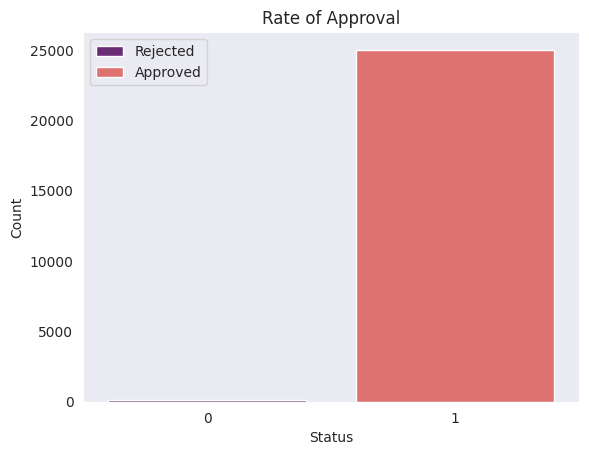

In [58]:
sns.set_style("dark")
sns.countplot(x="Status",data=appl_data, hue="Status",palette='magma')
plt.title('Rate of Approval')
plt.legend(labels=['Rejected','Approved'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [59]:
round(appl_data.Status.value_counts()*100/len(appl_data),2)

,count
Status,
1,99.52
0,0.48


Since the proportion of minority class ie 'Rejected' is less than 1%, we can say our data is extremely imbalanced. With so few 'Rejections' relative to 'Approvals', the training model will spend most of its time on 'Approved' examples and not learn enough from 'Rejected' ones. When we feed the dataset in batches into the models, many batches will have no 'Rejected' examples, so the gradients will be less informative.

###Removing unwanted columns:

Some columns or variables can be dropped if they do not add value to our analysis.

The column 'Applicant_ID' holds no significant data. They are just ID values. So removing "Applicant_ID' assuming it has no role in predicting the dependent/target variable.

In [60]:
appl_data.drop(['Applicant_ID'], axis=1, inplace=True)

In [61]:
appl_data.nunique()

,0
Applicant_Gender,2
Owned_Car,2
Owned_Realty,2
Total_Children,6
Total_Income,195
Income_Type,5
Education_Type,5
Family_Status,5
Housing_Type,6
Owned_Mobile_Phone,1


In [62]:
for col in appl_data.columns:
  print('\n\nUnique values in ', col, ':\n')
  print(appl_data[col].unique())



Unique values in  Applicant_Gender :

['M      ' 'F      ']


Unique values in  Owned_Car :

[1 0]


Unique values in  Owned_Realty :

[1 0]


Unique values in  Total_Children :

[0 3 1 2 4 5]


Unique values in  Total_Income :

[ 112500  270000  135000  130500  157500  405000  211500  360000  126000
  247500  297000  166500  225000  315000  148500  202500  450000  180000
   90000  765000  229500  292500   74250  144000  337500  193500  267750
  139500   67500  252000  900000  279000   76500  234000   81000  108000
  198000  216000   45000  238500  117000 1350000   99000  445500  427500
  306000  328500  310500  540000  171000  675000  121500   72000  184500
  189000  243000   94500  256500  697500  196650   40500  432000  162000
  103500  257625   58500  207000  720000  261000  175500  382500  119250
   63000  274500   90900  495000  220500   49500  630000  585000  145350
  173250  531000  387000 1125000  283500   36000  179100  265500  118350
  123750  116654  153000  324000  35100

The column 'Owned_Mobile_Phone' has only a single value , i.e 1. That means all the applicants hold a mobile phone. So it does not give any information in predicting output of the model. So we can remove that column.

In [63]:
appl_data.drop(['Owned_Mobile_Phone'], axis=1, inplace=True)

While going through the unique values, a lot of whitespaces is visible in unique values of categorical columns. To ensure it doesn't cause problems during any stage of analysis or encoding, the whitespaces have to be stripped.

In [64]:
for col in appl_data.select_dtypes(include='object').columns:

  #Strip leading and trailing whitespace from the categorical columns
  appl_data[col] = appl_data[col].str.strip()

###Further Analysis:

In [65]:
appl_data.loc[:,['Total_Income','Applicant_Age','Years_of_Working',"Total_Bad_Debt",'Total_Good_Debt','Status']].sort_values(by='Total_Income',ascending=False)

,Total_Income,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
23489,1575000,28,7,0,7,1
23491,1575000,28,7,0,42,1
23485,1575000,28,7,4,29,1
23486,1575000,28,7,0,40,1
23487,1575000,28,7,0,7,1
...,...,...,...,...,...,...
13377,31500,49,22,0,5,1
13378,31500,49,22,0,23,1
23527,27000,53,4,0,29,1
21179,27000,41,14,2,30,1


In [66]:
appl_data.loc[:,['Total_Income','Applicant_Age','Years_of_Working',"Total_Bad_Debt",'Total_Good_Debt','Status']].sort_values(by='Total_Income',ascending=False).loc[appl_data['Status']==0]

,Total_Income,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
12573,900000,28,3,7,1,0
198,765000,34,4,2,2,0
22151,585000,29,3,20,19,0
22152,585000,29,3,20,15,0
3965,540000,55,2,4,3,0
...,...,...,...,...,...,...
23017,67500,52,2,5,2,0
15082,67500,41,2,2,1,0
23018,67500,52,2,5,2,0
7163,67500,52,12,18,17,0


In [67]:
print("Maximum value of Total Income:",appl_data.Total_Income.max())
print("Minimum value of Total Income:",appl_data.Total_Income.min())

Maximum value of Total Income: 1575000
Minimum value of Total Income: 27000


The Total Income of applicants range from 27000 to 1575000.

In [68]:
max_income_row = appl_data.loc[appl_data['Total_Income'].idxmax()] #returns the index of the first occurrence of the maximum value
print(max_income_row)

Applicant_Gender                           F
Owned_Car                                  1
Owned_Realty                               1
Total_Children                             1
Total_Income                         1575000
Income_Type             Commercial associate
Education_Type              Higher education
Family_Status           Single / not married
Housing_Type               House / apartment
Owned_Work_Phone                           0
Owned_Phone                                0
Owned_Email                                0
Job_Title                           Managers
Total_Family_Members                       2
Applicant_Age                             28
Years_of_Working                           7
Total_Bad_Debt                             4
Total_Good_Debt                           29
Status                                     1
Name: 23485, dtype: object


In [69]:
min_income_row = appl_data.loc[appl_data['Total_Income'].idxmin()]
print(min_income_row)

Applicant_Gender                        F
Owned_Car                               0
Owned_Realty                            0
Total_Children                          0
Total_Income                        27000
Income_Type                       Working
Education_Type           Higher education
Family_Status              Civil marriage
Housing_Type            House / apartment
Owned_Work_Phone                        1
Owned_Phone                             0
Owned_Email                             0
Job_Title                        Managers
Total_Family_Members                    2
Applicant_Age                          41
Years_of_Working                       14
Total_Bad_Debt                          2
Total_Good_Debt                        15
Status                                  1
Name: 21178, dtype: object


In [70]:
pd.crosstab(appl_data["Status"], appl_data["Income_Type"], margins=True)

Income_Type,Commercial associate,Pensioner,State servant,Student,Working,All
Status,,,,,,
0,44,4,6,0,67,121
1,7008,9,2431,10,15549,25007
All,7052,13,2437,10,15616,25128


**Observations:**

The applicants under 'Students' category are approved for credit card. But, nearly half of the applicants under 'Pensioner' had their applications rejected.

The majority of Commercial Associates have their applications approved.

In [71]:
pd.crosstab(appl_data["Status"], appl_data["Family_Status"], margins=True)

Family_Status,Civil marriage,Married,Separated,Single / not married,Widow,All
Status,,,,,,
0,7,80,5,25,4,121
1,2126,17427,1459,3419,576,25007
All,2133,17507,1464,3444,580,25128


**Observations:**

* The majority of approved applications come from individuals who are married.

* 'Family Status' doesn't seem to be an important criterion.

Separating numerical and categorical columns for further analysis -

In [72]:
cat_cols=appl_data.select_dtypes(include='object').columns
num_cols = appl_data.select_dtypes(include='number').columns
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Job_Title'],
      dtype='object')
Numerical Variables:
Index(['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')


###Univariate Analysis



Value counts of Applicant_Gender
Applicant_Gender
F    15627
M     9501
Name: count, dtype: int64




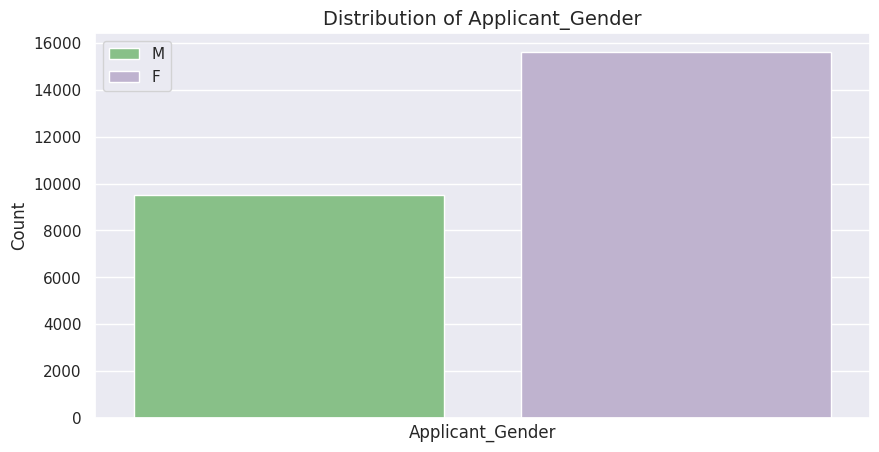



Value counts of Income_Type
Income_Type
Working                 15616
Commercial associate     7052
State servant            2437
Pensioner                  13
Student                    10
Name: count, dtype: int64




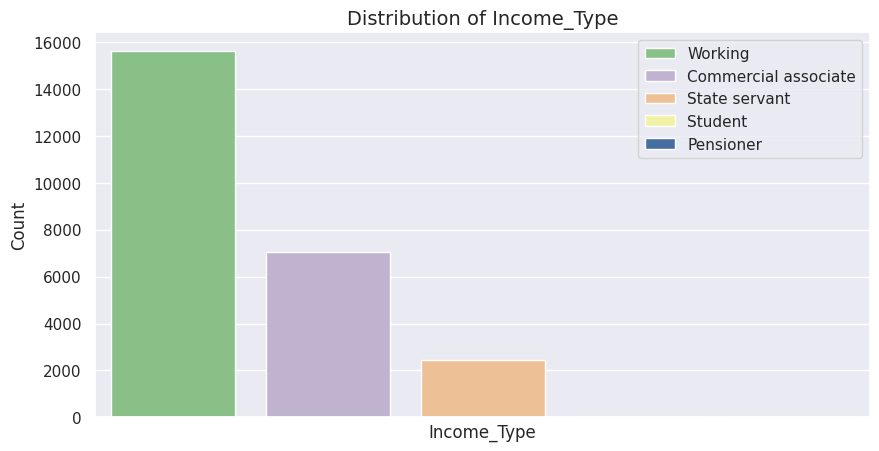



Value counts of Education_Type
Education_Type
Secondary / secondary special    16802
Higher education                  7132
Incomplete higher                  993
Lower secondary                    187
Academic degree                     14
Name: count, dtype: int64




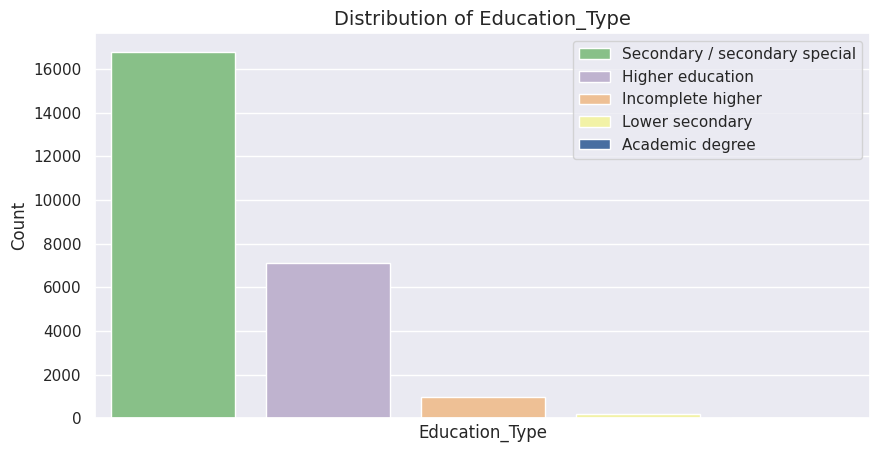



Value counts of Family_Status
Family_Status
Married                 17507
Single / not married     3444
Civil marriage           2133
Separated                1464
Widow                     580
Name: count, dtype: int64




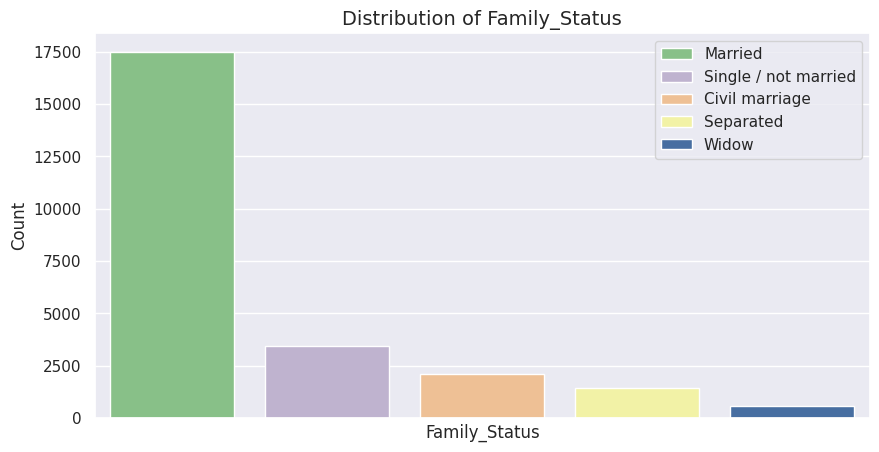



Value counts of Housing_Type
Housing_Type
House / apartment      22096
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: count, dtype: int64




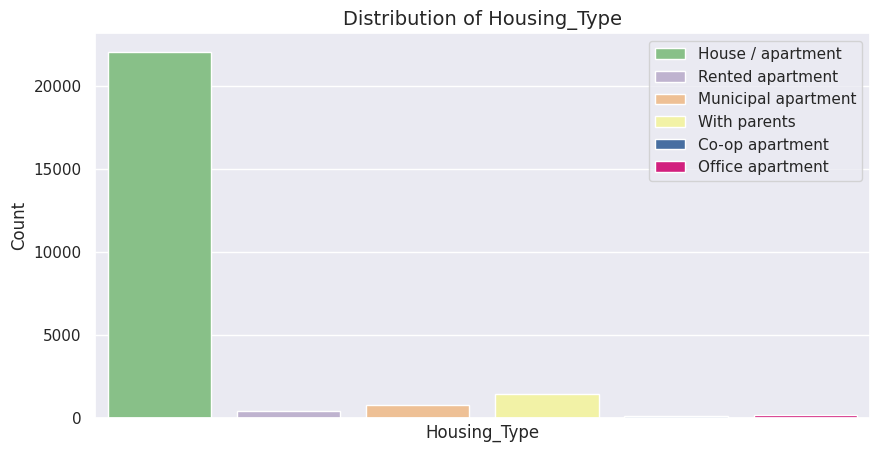



Value counts of Job_Title
Job_Title
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2135
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            549
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      173
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: count, dtype: int64




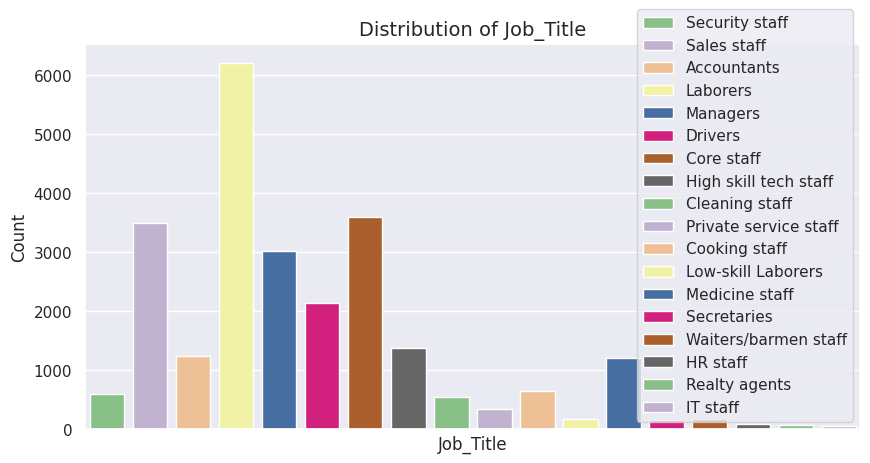

In [73]:
sns.set(style="darkgrid")
palette = sns.color_palette("Accent")

for col in cat_cols:

  print(f'\n\nValue counts of {col}')
  print(appl_data[col].value_counts())
  print('\n')

  #count plot
  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, data=appl_data, palette=palette)
  plt.title(f"Distribution of {col}", fontsize=14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel("Count", fontsize=12)
  plt.xticks([])
  plt.legend(labels=appl_data[col].unique())
  plt.show()

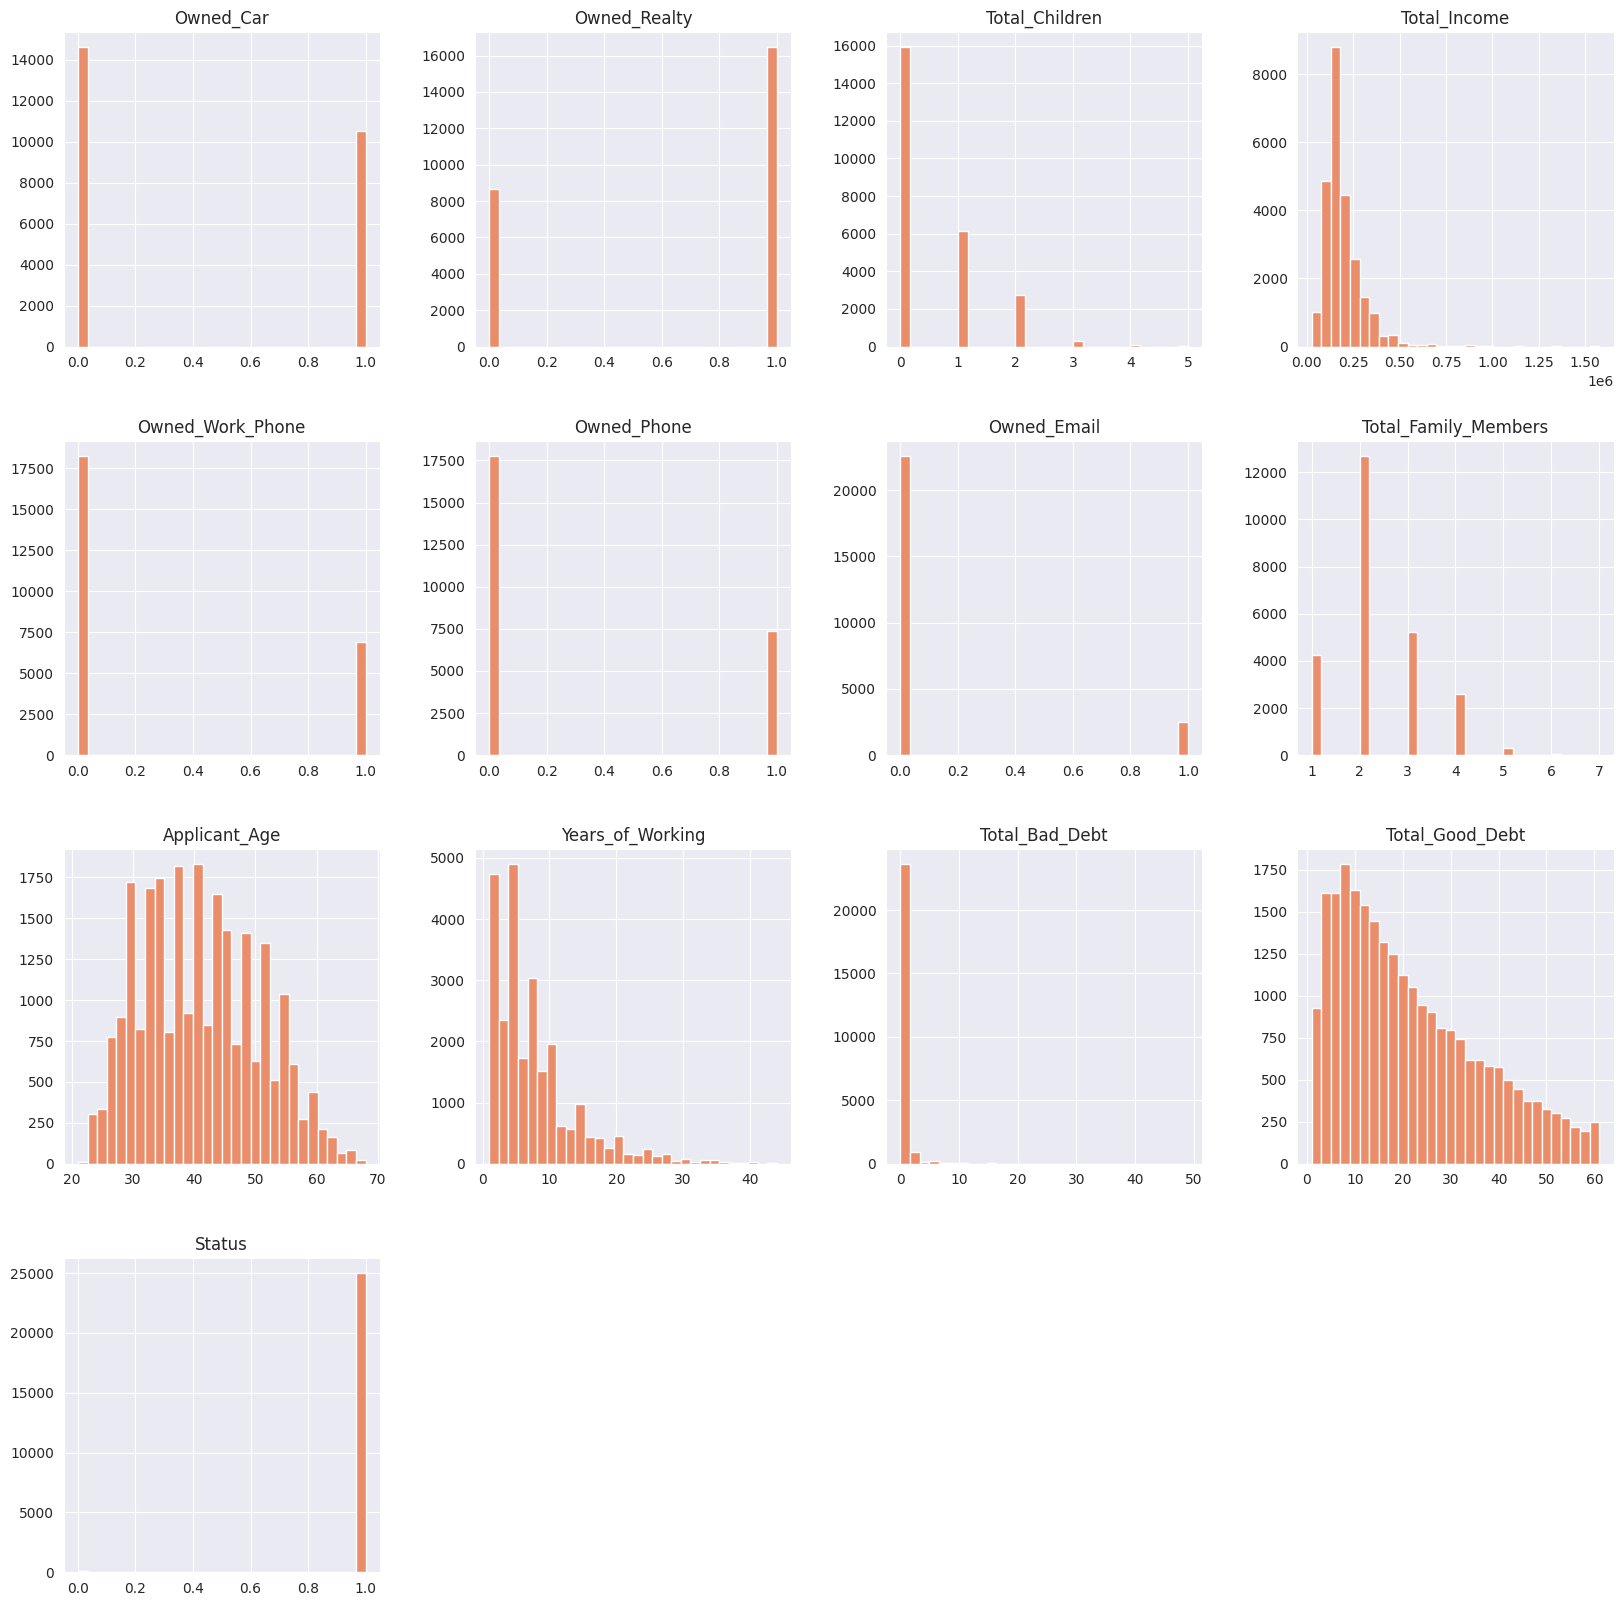

In [ ]:
# Numerical variables
#sns.set_style('dark')
sns.color_palette('flare')
appl_data.hist(bins=30, figsize=(20, 20))
plt.show()

###Bivariate Analysis:

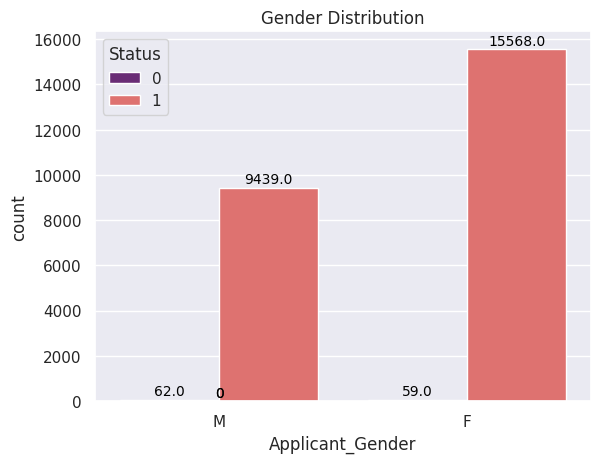

In [74]:
# Applicant Gender Vs Approval Status

ax=sns.countplot(x="Applicant_Gender", data=appl_data, hue="Status", palette="magma")

#Adding annotations since the values for rejection is too less to read from the plot.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',         #data to be displayed
                (p.get_x() + p.get_width() / 2, p.get_height()), #(x,y) co-ordinates
                ha='center',    #horizontally centers the text on the bar.
                fontsize=10, color='black', xytext=(0,3), #text is placed slightly above the top of the bar, vertical position since x is 0
                textcoords='offset points') #for the proper placing of text


plt.title('Gender Distribution')
plt.show()

**Observations:**

* The female applicants were almost 1.5 times greater than the male applicants.
* Rate of Approval is more for female applicants.
* The number of rejected appications for more in males eventhough the number of male applicants is considerably less.

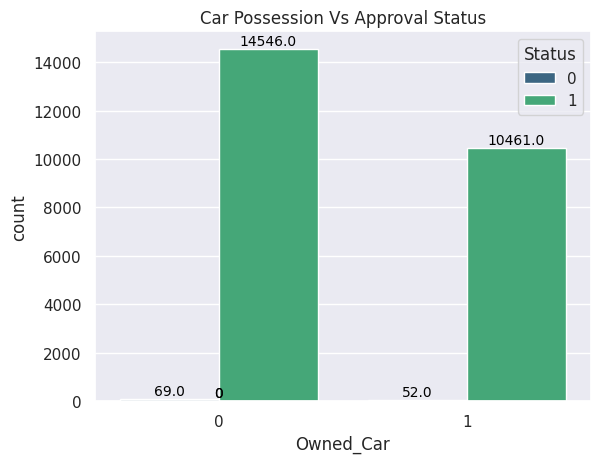

In [75]:
#Possession of Car and Status of Approval

ax=sns.countplot(x="Owned_Car", data=appl_data, hue="Status", palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',         #data to be displayed
                (p.get_x() + p.get_width() / 2, p.get_height()), #(x,y) co-ordinates
                ha='center',    #horizontally centers the text on the bar.
                fontsize=10, color='black', xytext=(0,3), #text is placed slightly above the top of the bar, vertical position since x is 0
                textcoords='offset points') #for the proper placing of text


plt.title('Car Possession Vs Approval Status')
plt.show()

**Observations:**

Most of the applicants do not own a car yet the rate of approval of credit card is higher in them.

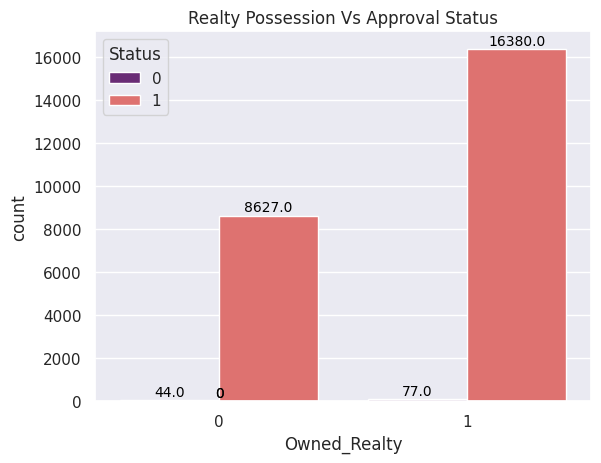

In [76]:
#Possession of Realty Vs Approval Status

ax=sns.countplot(x="Owned_Realty", data=appl_data, hue="Status", palette="magma")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',         #data to be displayed
                (p.get_x() + p.get_width() / 2, p.get_height()), #(x,y) co-ordinates
                ha='center',    #horizontally centers the text on the bar.
                fontsize=10, color='black', xytext=(0,3), #text is placed slightly above the top of the bar, vertical position since x is 0
                textcoords='offset points') #for the proper placing of text


plt.title('Realty Possession Vs Approval Status')
plt.show()

**Observations:**

The applicants who own a realty is almost double of those who doesn't have any.

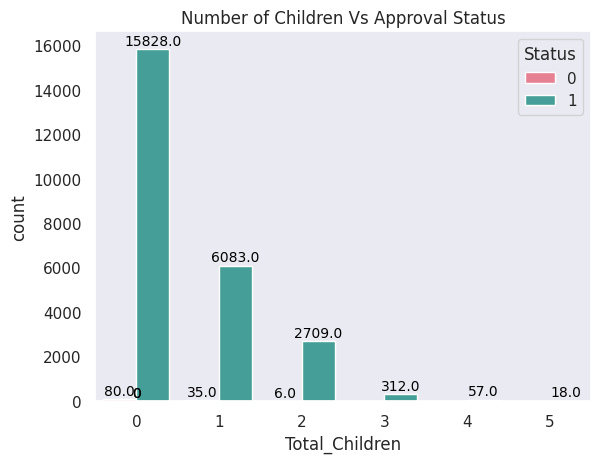

In [77]:
#Number of Children Vs Approval Status
sns.set_style('dark')
ax=sns.countplot(x="Total_Children", data=appl_data, hue="Status", palette="husl")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',         #data to be displayed
                (p.get_x() + p.get_width() / 2, p.get_height()), #(x,y) co-ordinates
                ha='center',    #horizontally centers the text on the bar.
                fontsize=10, color='black', xytext=(0,3), #text is placed slightly above the top of the bar, vertical position since x is 0
                textcoords='offset points') #for the proper placing of text
plt.title('Number of Children Vs Approval Status')
plt.show()

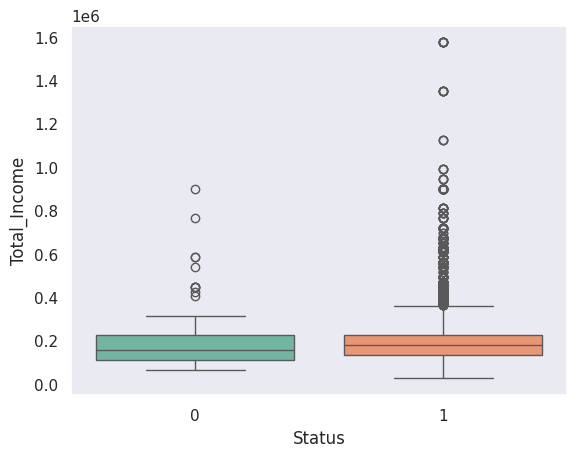

In [78]:
#Total Income Vs Approval Status
sns.boxplot(x="Status", y='Total_Income', data=appl_data, palette='Set2')
plt.show()


In the above boxplot, the outliers are less for 'Rejected' applications. It is smaller in value as well.
On the otherside, it shows so many outliers for 'Approved' Status. The outliers are so specific and highly deviated. But there might be people with high income as applicants.
It clearly states that 'Total_Income' plays a role in determining the status of approval.

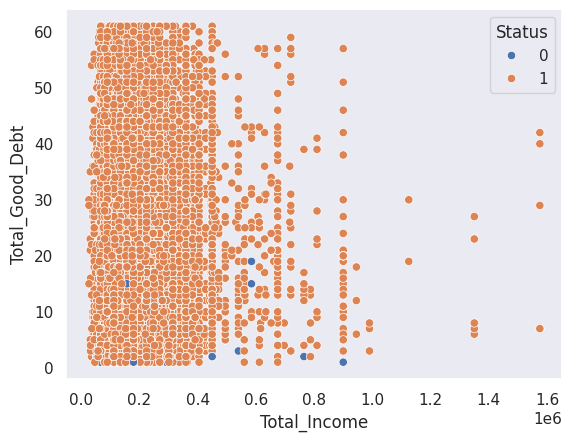

In [79]:
#Total_Good_Debt Vs Total_Income

sns.scatterplot(x='Total_Income',y='Total_Good_Debt',data=appl_data, hue='Status')
plt.show()

**Observation:**

 The majority of data points belong to class "1" and are clustered in the left region of the plot, indicating most of the applicants are having lower "Total_Income" and most of the low income people has "Total_Good_Debt" .


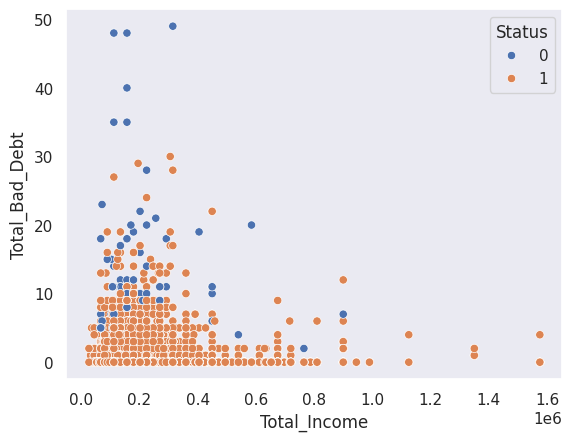

In [80]:
#Total_Bad_Debt Vs Total_Income

sns.scatterplot(x='Total_Income',y='Total_Bad_Debt', data=appl_data, hue='Status')
plt.show()

**Observations:**

* People with lower "Total_Income" have larger values for 'Total_Bad_Debt'.
* Chances of rejection is high in people with larger 'Total_Bad_Debt' values.
* People with higher 'Total_Income' have very few 'Total_Bad_Debt' instances.

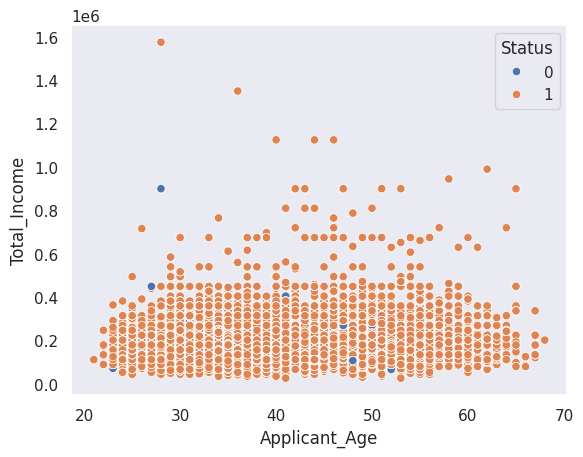

In [81]:
#Applicant_Age Vs Total_Income

sns.scatterplot(x='Applicant_Age',y='Total_Income', data=appl_data, hue='Status')
plt.show()

**Observations:**

* 'Applicant_Age' ranges from early-twenties to late sixties. Most of the applicants are middle-aged.
* Some of the applicants in late twenties have the highest 'Total_Income'.
* 'Total_Income' is high in middle-aged applicants.

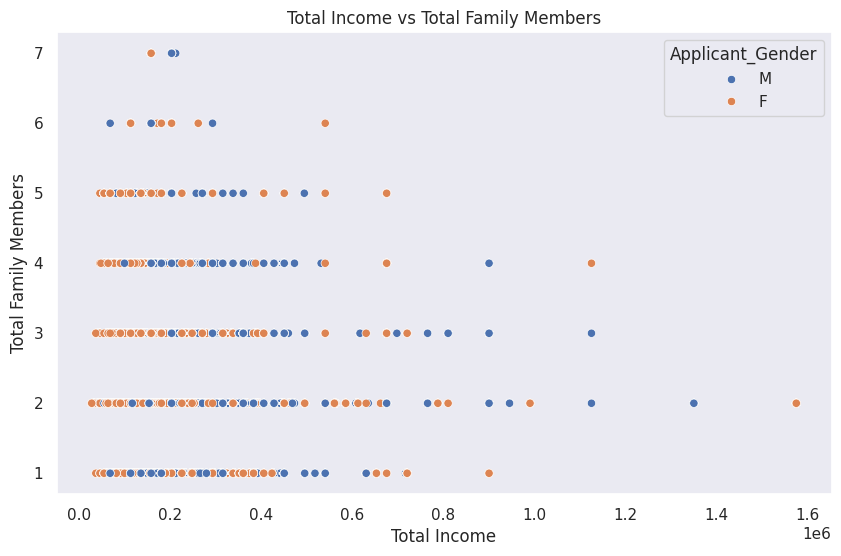

In [83]:
# 6. Total Income vs Total Family Members
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Income', y='Total_Family_Members', hue='Applicant_Gender', data=appl_data, palette='deep')
plt.title('Total Income vs Total Family Members')
plt.xlabel('Total Income')
plt.ylabel('Total Family Members')
plt.show()

**Observations:**

* A significant portion of the data points are concentrated in the lower income range with smaller family sizes.

* Larger families are also seen in lower income people.

* There are a few data points with high Total Income and large family sizes, which could be considered potential outliers for further analysis.


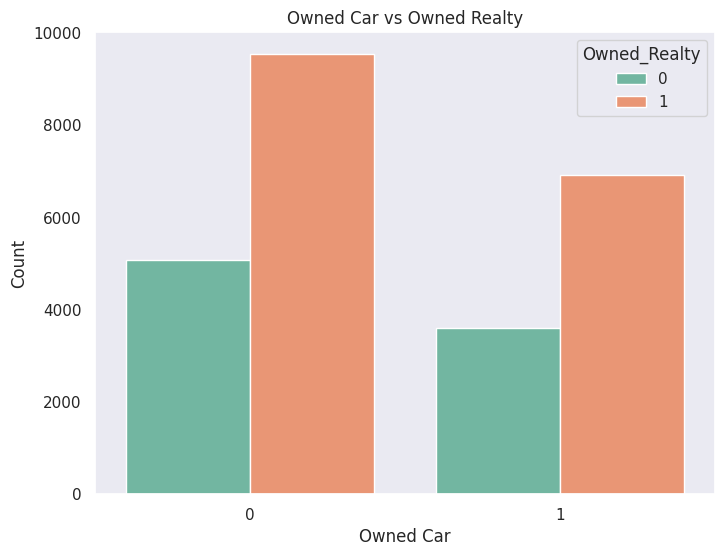

In [84]:
# 8. Owned Car vs Owned Realty
plt.figure(figsize=(8, 6))
sns.countplot(x='Owned_Car', hue='Owned_Realty', data=appl_data, palette='Set2')
plt.title('Owned Car vs Owned Realty')
plt.xlabel('Owned Car')
plt.ylabel('Count')
plt.show()


**Observations:**

* Majority of the people doesn't own a car, but most of them have realty.

* Out of the people who own a car, some of them doesn't own a realty.

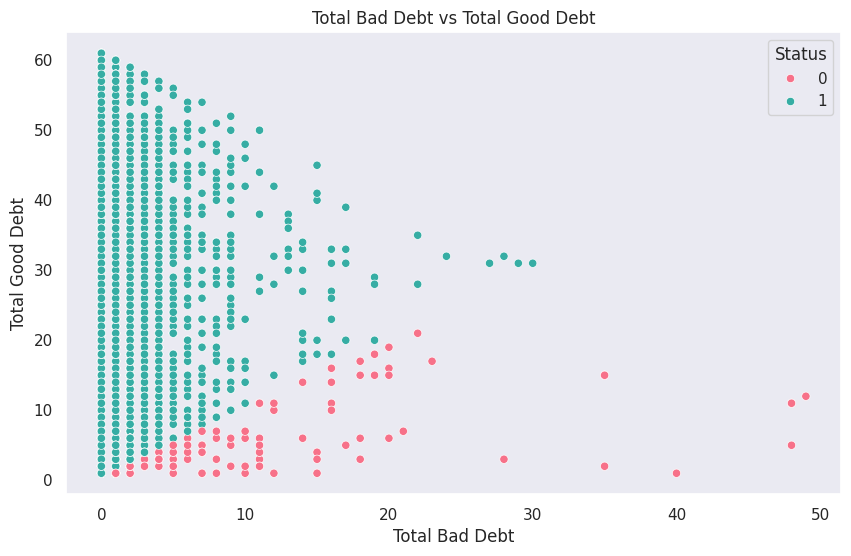

In [85]:
# 10. Total Bad Debt vs Total Good Debt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Bad_Debt', y='Total_Good_Debt', hue='Status', data=appl_data, palette='husl')
plt.title('Total Bad Debt vs Total Good Debt')
plt.xlabel('Total Bad Debt')
plt.ylabel('Total Good Debt')
plt.show()

The approval rate for people with 'Good Debt' is proportional. When 'Bad Debt' increases, the application is rejected.

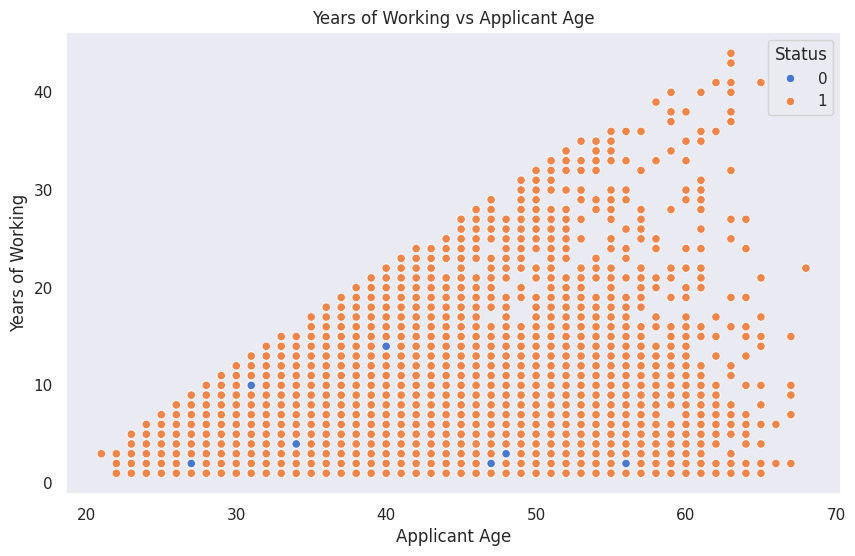

In [86]:
# 12. Years of Working vs Applicant Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Applicant_Age', y='Years_of_Working', hue='Status', data=appl_data, palette='muted')
plt.title('Years of Working vs Applicant Age')
plt.xlabel('Applicant Age')
plt.ylabel('Years of Working')
plt.show()

**Observations:**

* There's a strong positive correlation between "Years of Working" and "Applicant Age," as expected. Older applicants generally have more years of working experience.

* The majority of data points cluster in the mid-range.


###Multivariate Analysis - Pairplot

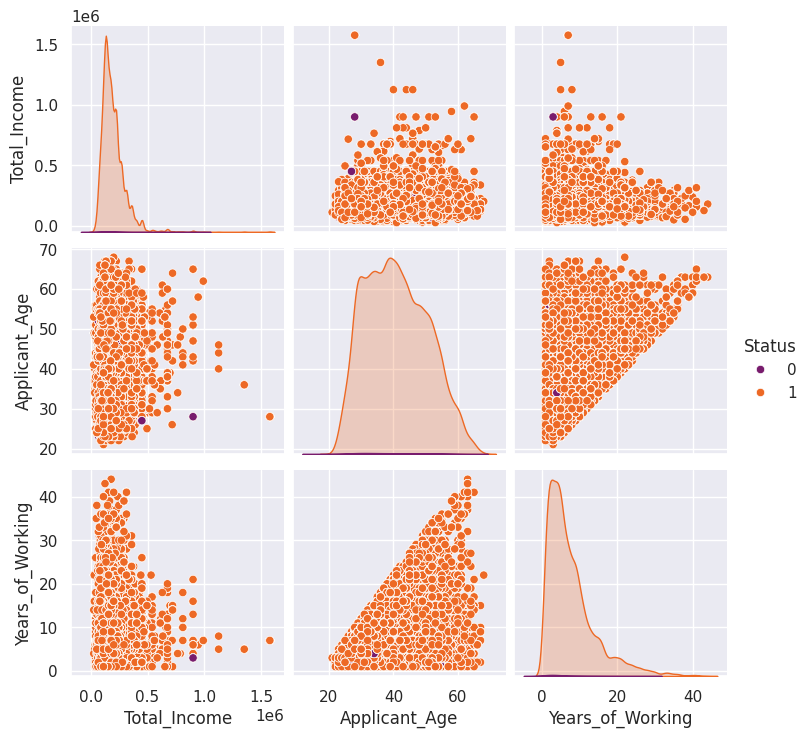

In [90]:
sns.set_style("darkgrid")
sns.pairplot(data=appl_data[['Total_Income','Applicant_Age','Years_of_Working','Status']], hue='Status', palette='inferno')

**Observations:**

* Total Income: The distribution of Total Income is highly skewed to the right, with a long tail towards higher income values. There are a few outliers with exceptionally high incomes.
* Applicant Age: Applicant Age follows a roughly normal distribution.
* Years of Working: The distribution of Years of Working is skewed  with a concentration of values in the lower range.
*  The two classes (Status 0 and Status 1) show some overlap in the scatter plots, suggesting that these variables alone might not be sufficient for perfect classification.

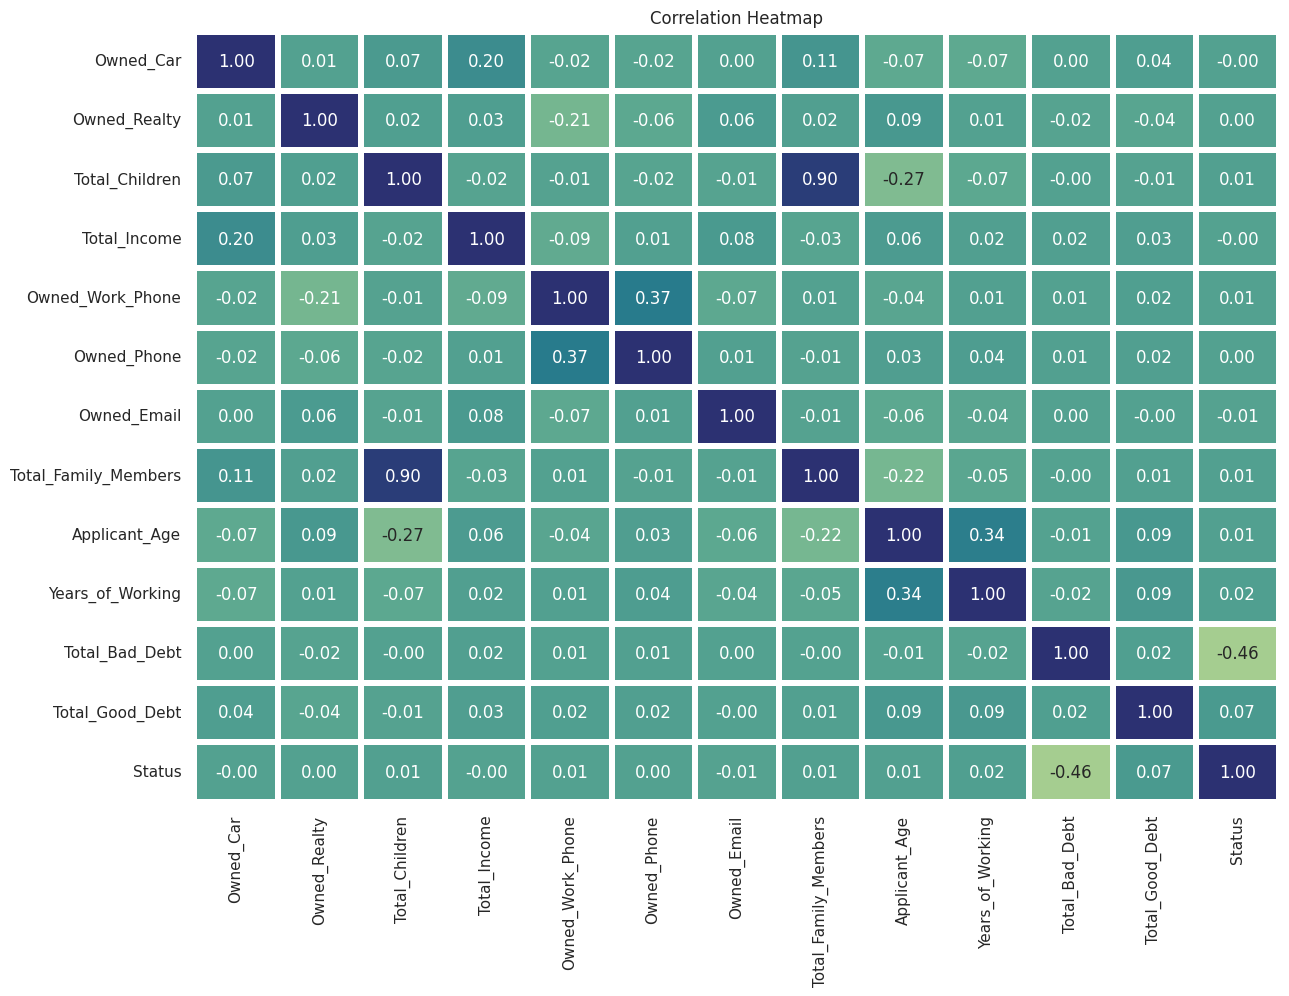

In [91]:
# 11. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = appl_data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', linecolor='white', linewidth=3, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

#Checking for Skewness:

Skewness is a statistical measure that describes degree of the asymmetry of a data distribution around its mean. A data is called as skewed when curve appears distorted either to the left or to the right, in a statistical distribution. i.e one tail is longer than the other.

 A distribution is symmetric if it is centred around its mean and the left and right sides are mirror images of each other.
 Sometimes, the normal distribution tends to tilt more on one side. This is because the probability of data being more or less than the mean is higher and hence makes the distribution asymmetrical. A distribution is skewed if it is not symmetric.

Owned_Car
Skewness : 0.3309472983422363


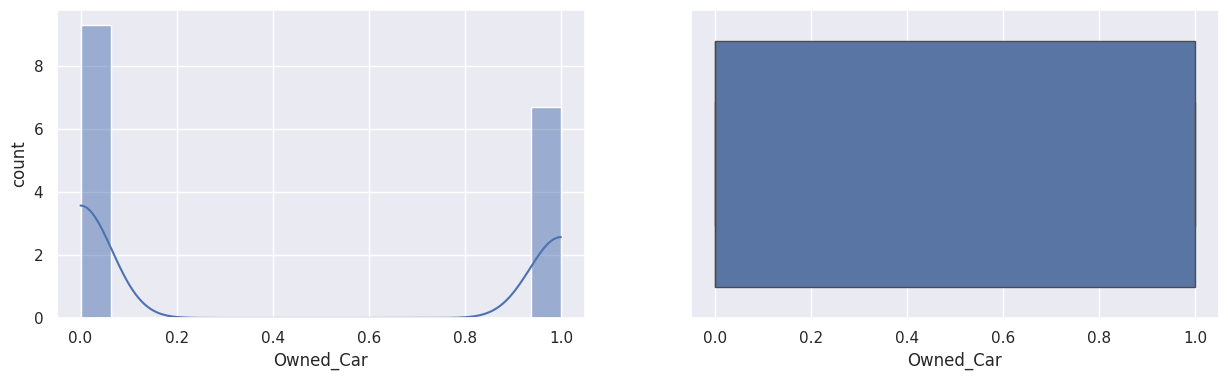

Owned_Realty
Skewness : -0.6518240762415578


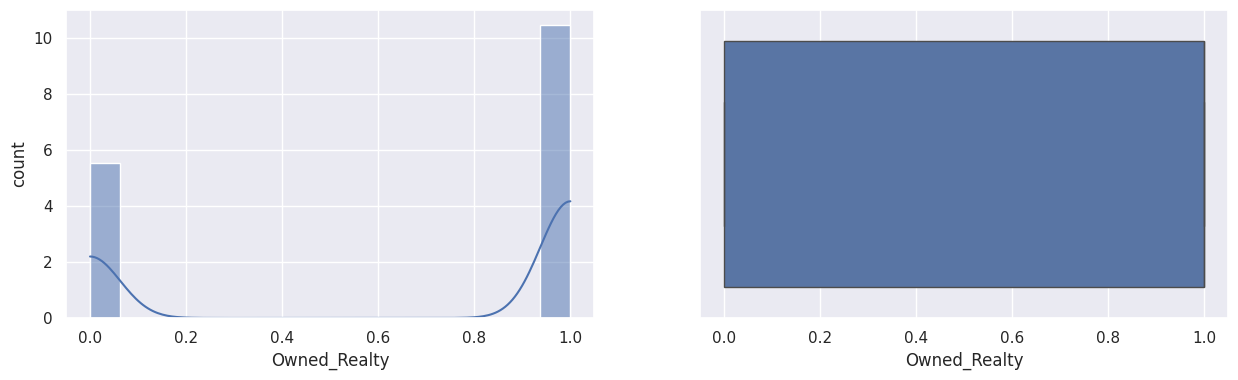

Total_Children
Skewness : 1.4772750155469205


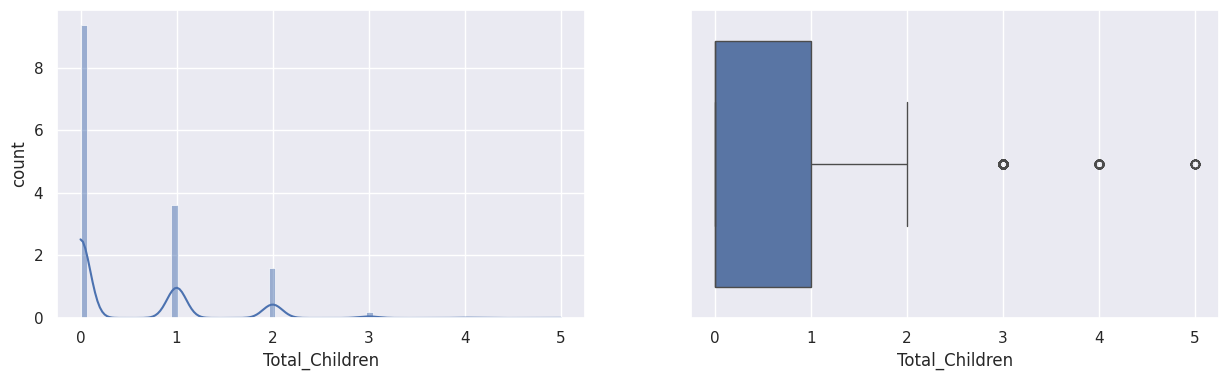

Total_Income
Skewness : 2.964037810898012


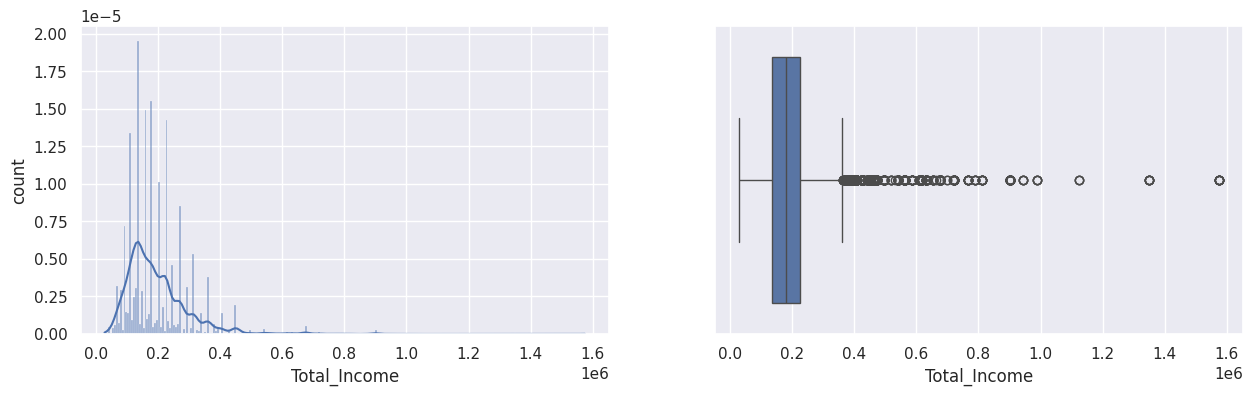

Owned_Work_Phone
Skewness : 1.0148554784818


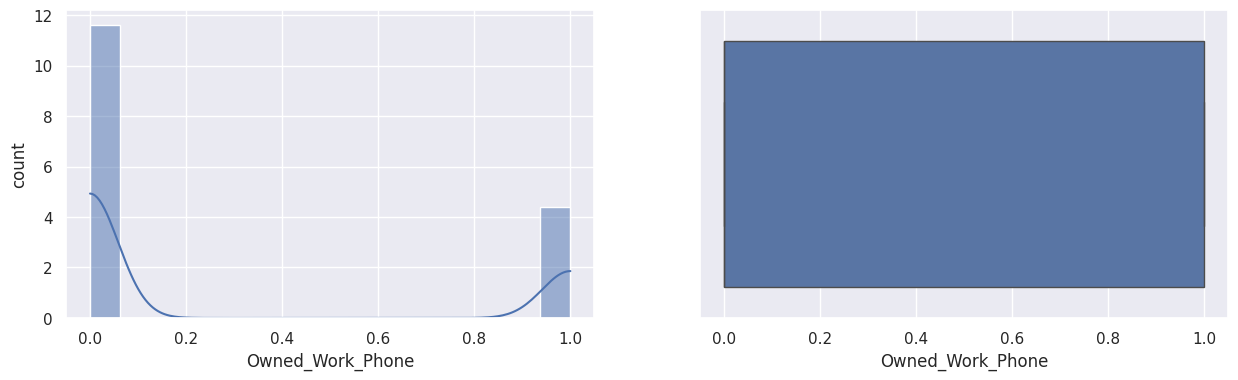

Owned_Phone
Skewness : 0.91104092159702


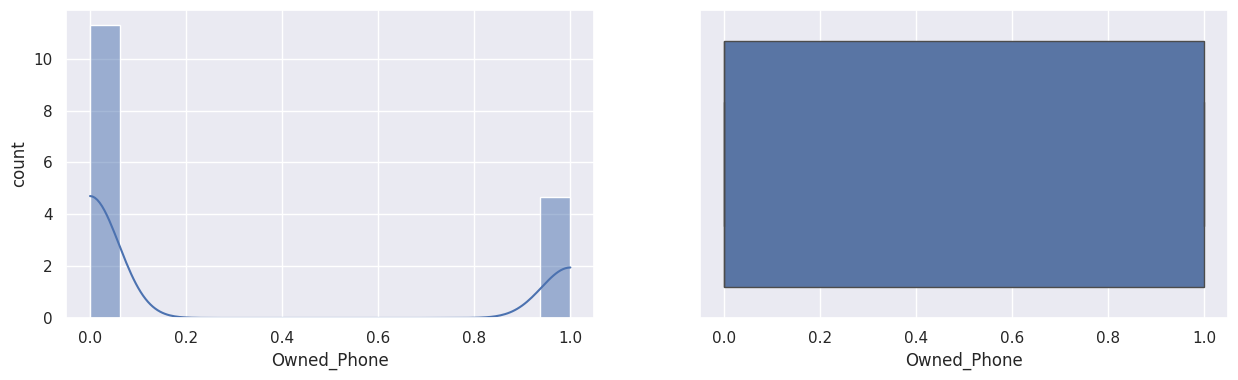

Owned_Email
Skewness : 2.6542067893840953


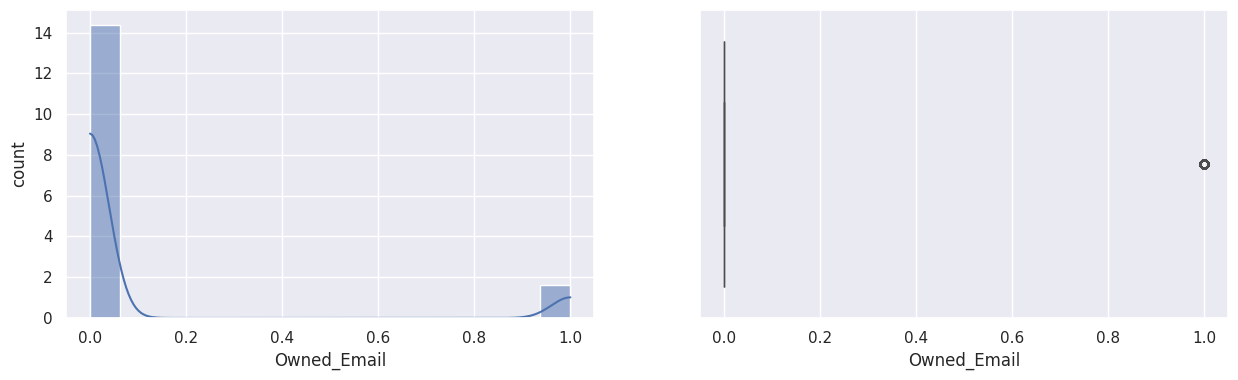

Total_Family_Members
Skewness : 0.7844887442337911


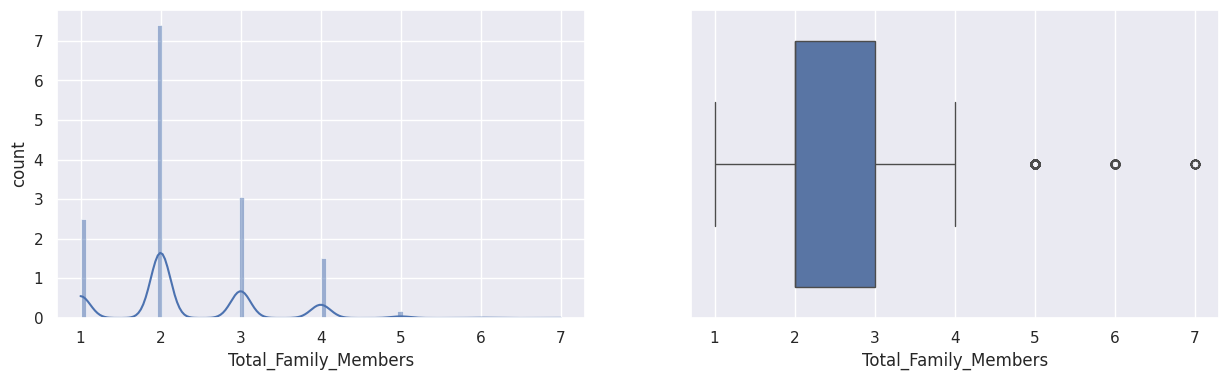

Applicant_Age
Skewness : 0.27145447040373916


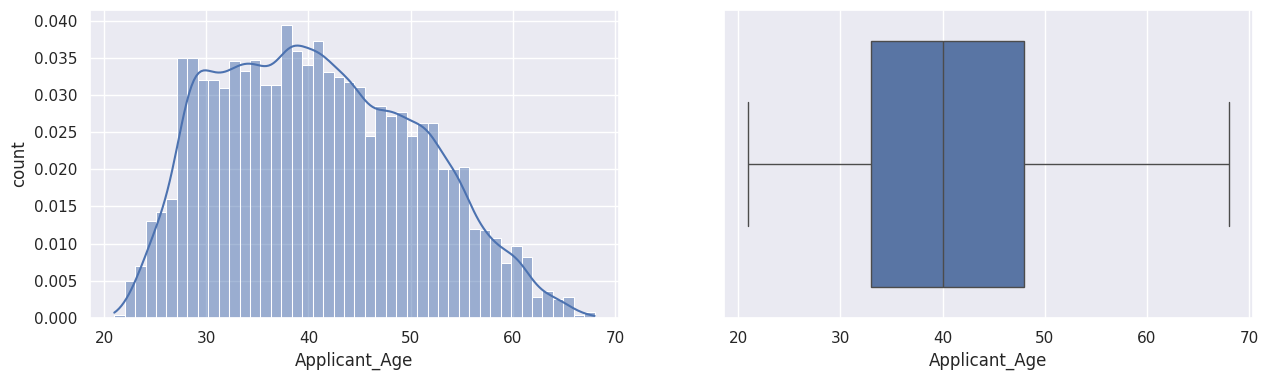

Years_of_Working
Skewness : 1.7242349362023368


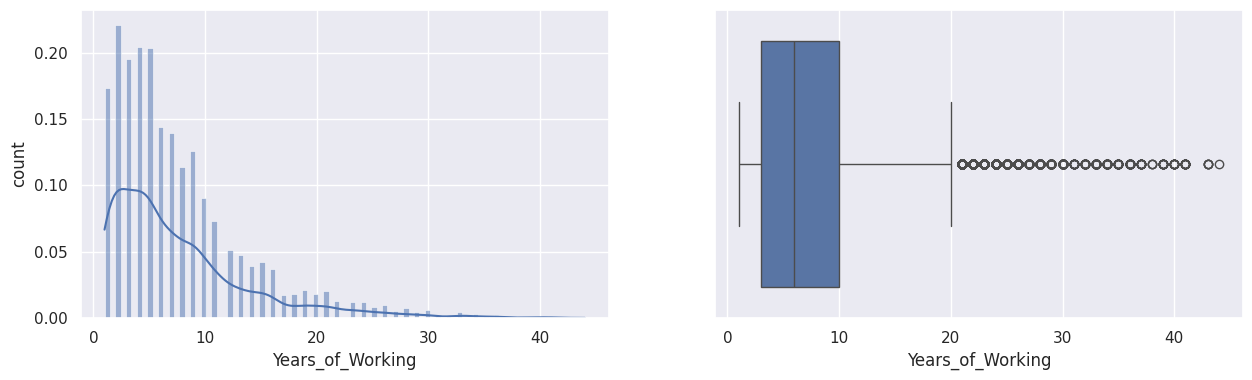

Total_Bad_Debt
Skewness : 12.432799215282186


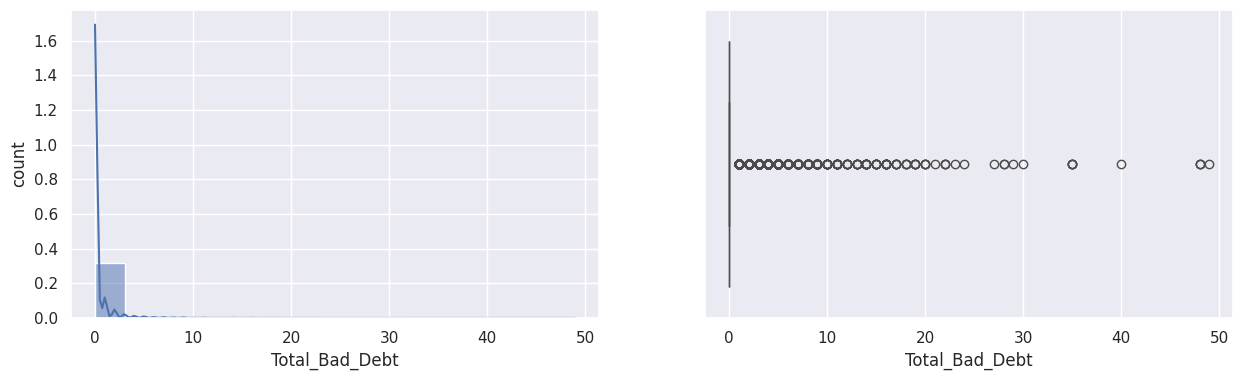

Total_Good_Debt
Skewness : 0.7382906800171972


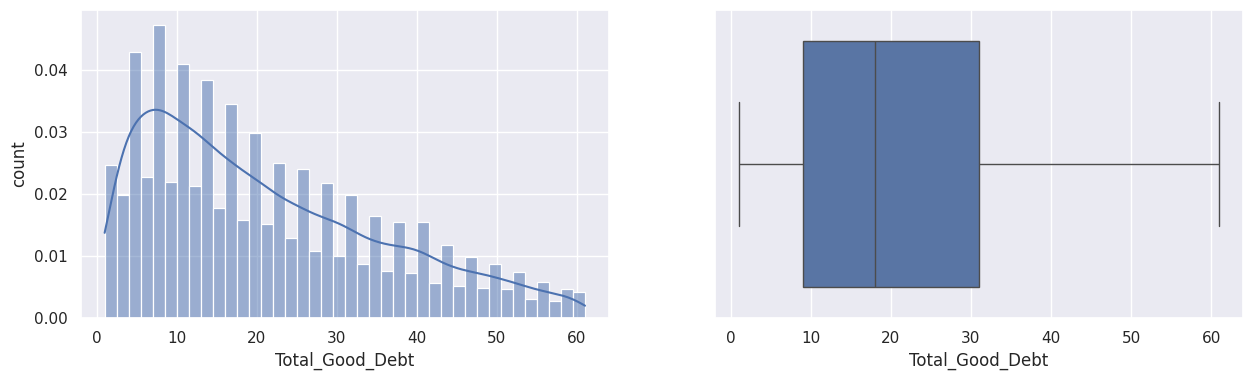

Status
Skewness : -14.307295290381374


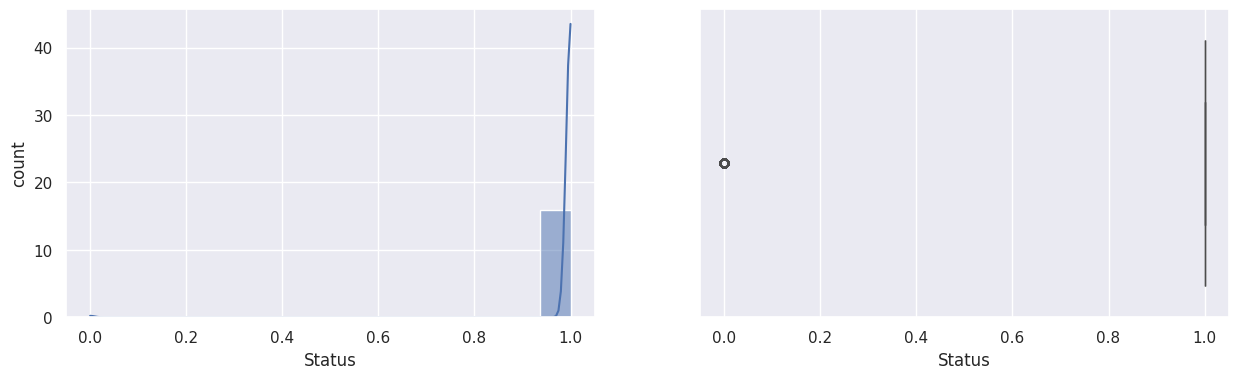

In [92]:
for col in num_cols:
    print(col)
    print('Skewness :', appl_data[col].skew())
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=appl_data[col], kde=True, stat='density')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=appl_data[col])
    plt.show()

**Observations:**
* The columns 'Owned_Car', 'Owned_Realty', 'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email' and "Status" are basically categorical values encoded into 0/1.
* 'Applicant_Age' is almost symmetrical. (skewness = 0.27)
* 'Total_Good_Debt' (skewness = 0.73) and 'Total_Family_Members' being skewness = 0.78 are moderately right skewed.
* 'Total_Income' (skewness = 2.96), 'Total_Children' (skewness = 1.47), 'Total_Bad_Debt (skewness = 12.43) and 'Years_of_Working' (skewness = 1.72) and  are right skewed or positive skewed. Lower values are clustered in the “hill” of the distribution, while extreme values are in the long right tail. The mean is greater than the median, and the mode is less than both mean and median.

Skewness is a measure of asymmetry in the distribution of continuous variables, so it's not applicable to categorical columns even if it is encoded.

Correctly categorizing and measuring skewness provides insights into how values are spread around the mean and influence the choices of statistical techniques and data transformations.

###Handling Skewed Columns:

There are several ways to handle skewed data. Addressing it is necessary because many statistical techniques and machine learning models perform better when the data is approximately normally distributed.

**Transformation:**

In data analysis, transformation is the replacement of a variable by a function of that variable such that it changes the shape of a distibution or relationship.

**1. Log Transformation:**
It is one of the common methods to deal with positive skewed data. It effectively minimizes the large scale differences by taking the natural log of all data points.

**2.Square Root Transformation:** It is commonly applied to counted data, especially if the values are mostly rather small.  It is also used for reducing right skewness, and has the advantage that it can be applied to zero values.

**3.Cube Root Transform:** It is also used for reducing right skewness, and has the advantage that it can be applied to zero and negative values. It is weaker than the logarithm but stronger than the square root transformation.


**4.Box-Cox Transformation:** The Box-Cox transformation is a family of power transformations indexed by a parameter 𝜆. It systematically finds the best power transformation to reduce skewness and stabilize variance, enhancing the data’s normality.



In [93]:
from scipy.stats import boxcox
def transform_col(column):
    print(f"Skewness before any Transformation: {appl_data[column].skew():.5f}")

    # Applying log transformation
    if (appl_data[column] > 0).all():  # Log transformation requires positive values
        log_transformed = np.log(appl_data[column])
        print(f"Skewness after Log Transformation: {log_transformed.skew():.5f}")
    else:
        log_transformed = None
        print("Log Transformation not applied due to either zero or non-positive values.")

    # Applying square root transformation
    if (appl_data[column] >= 0).all():  # Square root requires non-negative values
        sqrt_transformed = np.sqrt(appl_data[column])
        print(f"Skewness after Square Root Transformation: {sqrt_transformed.skew():.5f}")
    else:
        sqrt_transformed = None
        print("Square Root Transformation not applied due to negative values.")

    # Applying cube root transformation (works with all values)
    cbrt_transformed = np.cbrt(appl_data[column])
    print(f"Skewness after Cube Root Transformation: {cbrt_transformed.skew():.5f}")

    # Applying Box-Cox transformation
    if (appl_data[column] > 0).all():  # Box-Cox transformation requires positive values
        boxcox_transformed,lambda_value = boxcox(appl_data[column]) #λ is transformation parameter.
        boxcox_transformed = pd.Series(boxcox_transformed)
        print(f"Skewness after Box-Cox Transformation: {boxcox_transformed.skew():.5f}")
    else:
        boxcox_transformed = None
        print("Box-Cox Transformation not applied due to either zero or non-positive values.")


    plt.figure(figsize = (15, 8))
    plt.subplot(3, 2, 1)
    sns.histplot(x=appl_data[column], kde=True, stat='density')
    plt.title('Original Data')
    plt.subplot(3, 2, 2)
    sns.histplot(x=log_transformed, kde=True, stat='density')
    plt.title('Log Transformed Data')
    plt.subplot(3, 2, 3)
    sns.histplot(x=sqrt_transformed, kde=True, stat='density')
    plt.title('Sqrt Transformed Data')
    plt.subplot(3, 2, 4)
    sns.histplot(x=cbrt_transformed, kde=True, stat='density')
    plt.title('Cbrt Transformed Data')
    plt.subplot(3, 2, 5)
    sns.histplot(x=boxcox_transformed, kde=True, stat='density')
    plt.title('BoxCox Transformed Data')
    plt.tight_layout()
    plt.show()

    return log_transformed, sqrt_transformed, cbrt_transformed, boxcox_transformed


Skewness before any Transformation: 2.96404
Skewness after Log Transformation: 0.16403
Skewness after Square Root Transformation: 1.18634
Skewness after Cube Root Transformation: 0.80027
Skewness after Box-Cox Transformation: -0.00697


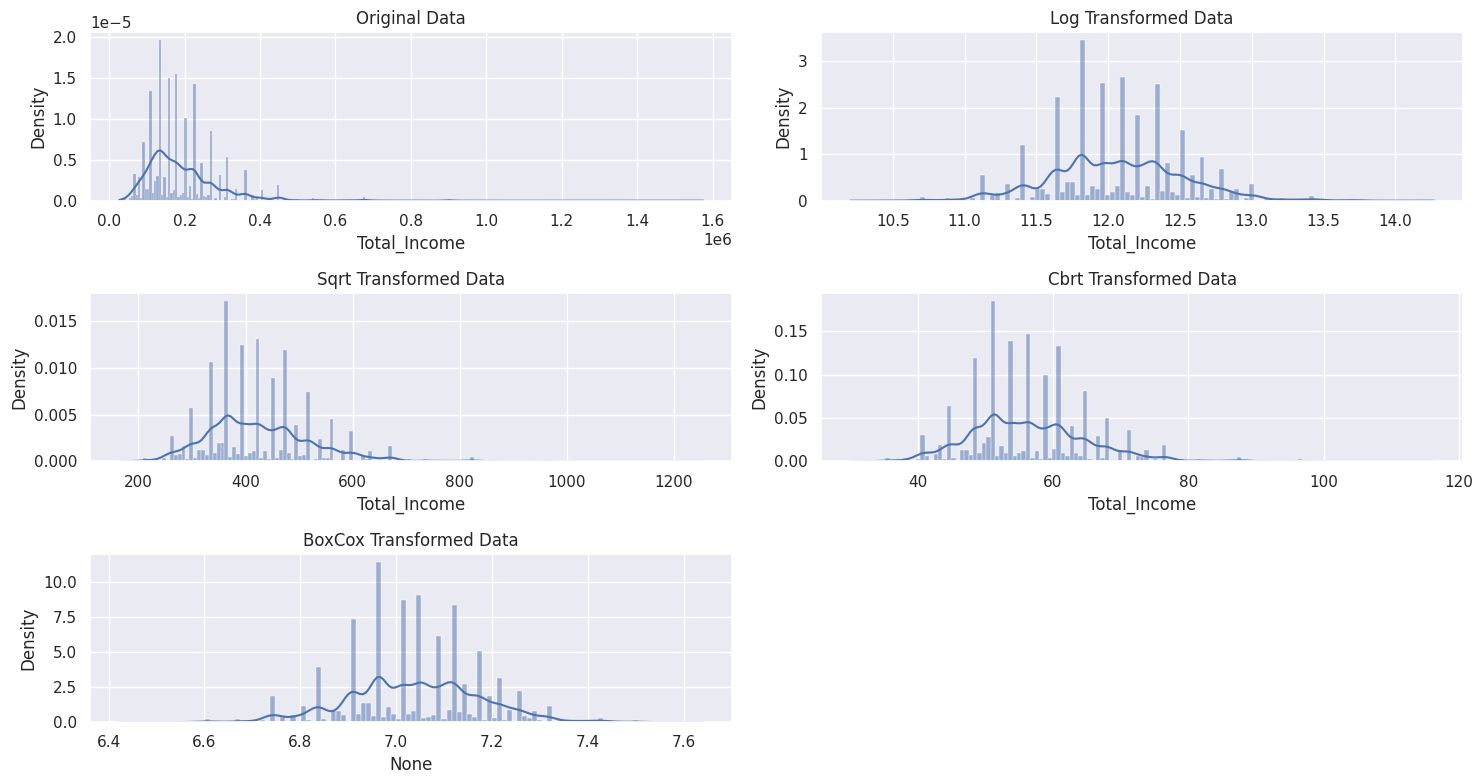

In [94]:
log_Total_Income, sqrt_Total_Income, cbrt_Total_Income, boxcox_Total_Income = transform_col('Total_Income')

The skewness of 'Total_Income' has considerably reduced after Box-Cox Transformation. Hence, we use Box-Cox  Transformation for 'Total_Income'.

In [95]:
appl_data['Total_Income'] = boxcox_Total_Income

Skewness before any Transformation: 0.73829
Skewness after Log Transformation: -0.70406
Skewness after Square Root Transformation: 0.13402
Skewness after Cube Root Transformation: -0.11016
Skewness after Box-Cox Transformation: -0.08379


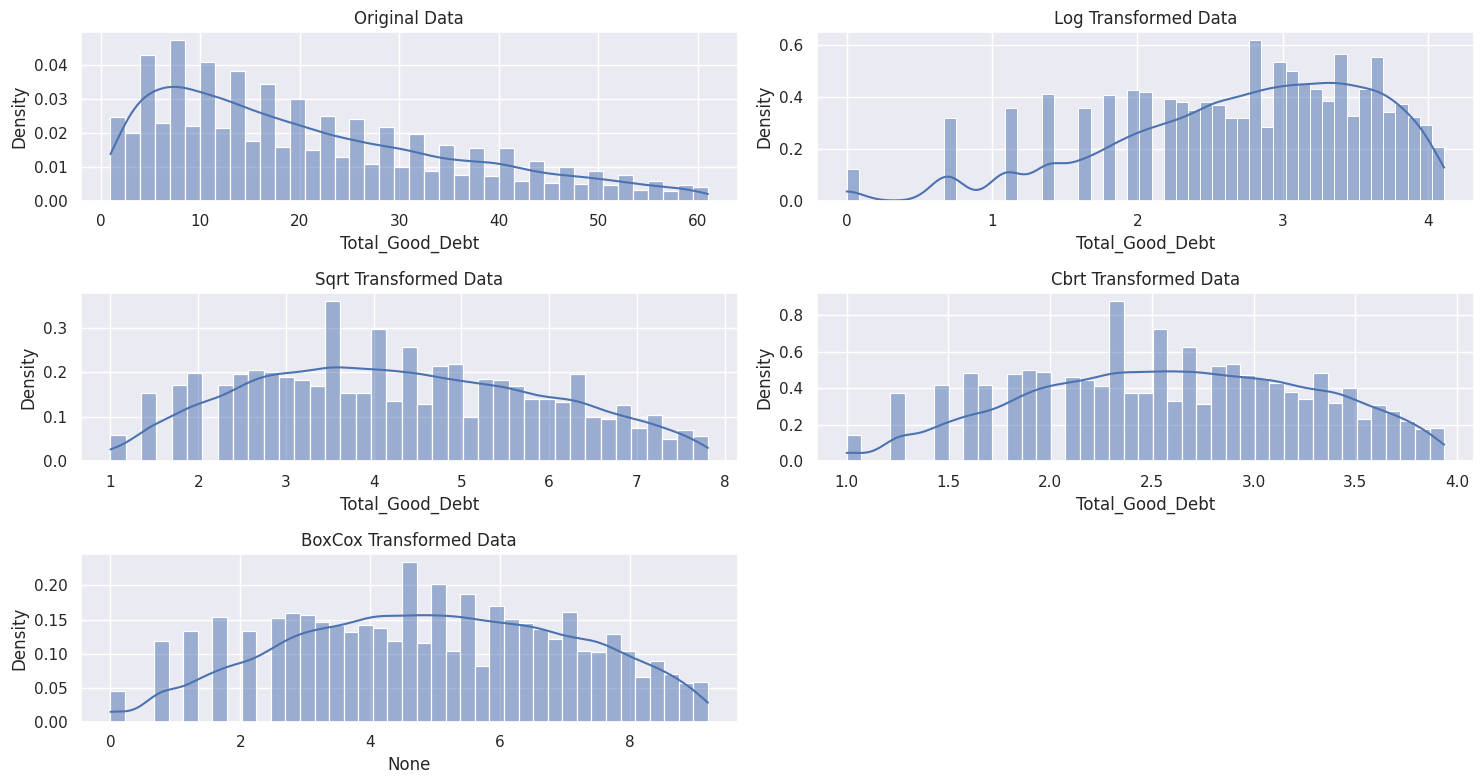

In [96]:
log_Total_Good_Debt, sqrt_Total_Good_Debt, cbrt_Total_Good_Debt, boxcox_Total_Good_Debt = transform_col('Total_Good_Debt')

Skewness of 'Total_Good_Debt' has considerably reduced by Box-Cox Transformation. So, we use Box-Cox Transformation for 'Total_Good_Debt'.

In [97]:
appl_data['Total_Good_Debt'] = boxcox_Total_Good_Debt

Skewness before any Transformation: 1.72423
Skewness after Log Transformation: -0.24746
Skewness after Square Root Transformation: 0.71862
Skewness after Cube Root Transformation: 0.39202
Skewness after Box-Cox Transformation: -0.01769


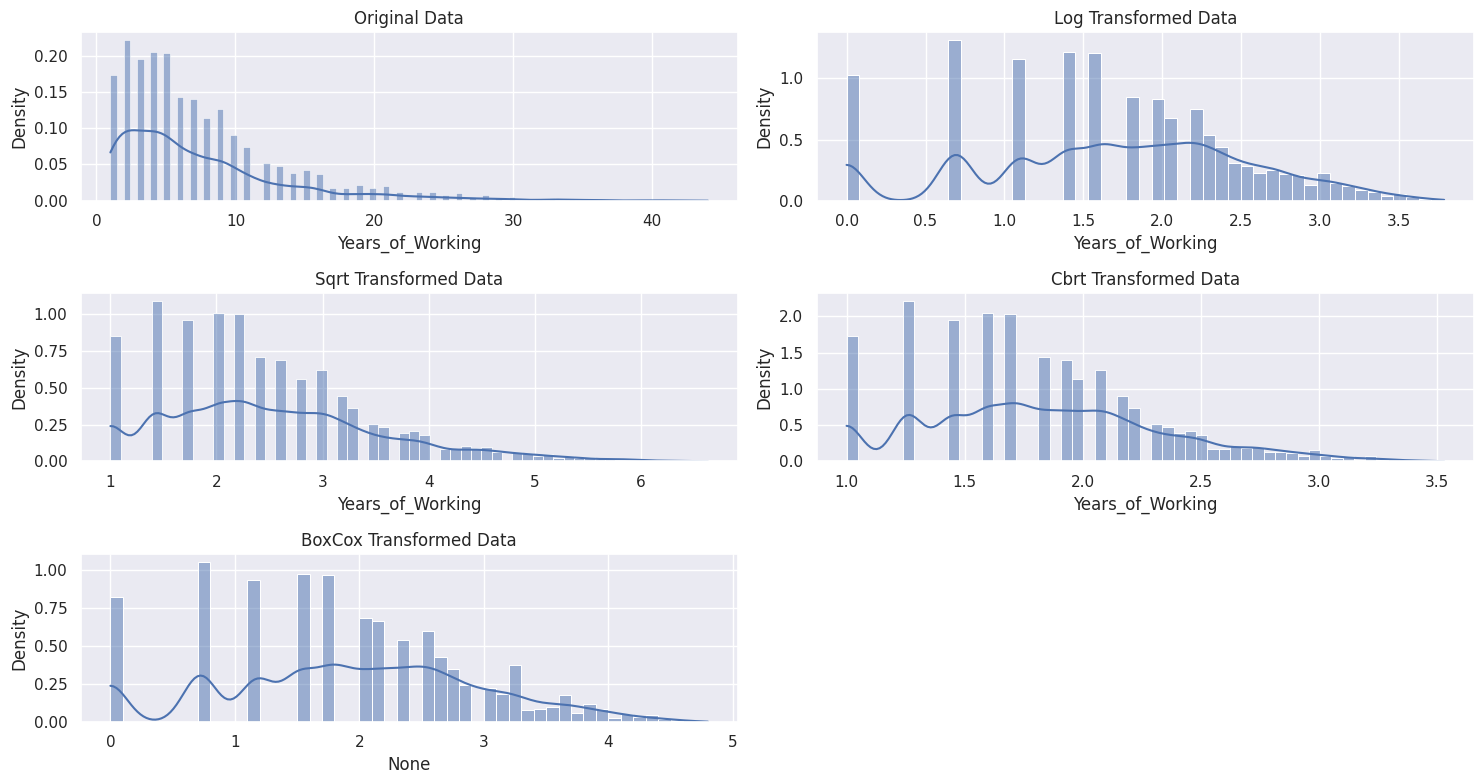

In [98]:
log_Years_of_Working, sqrt_Years_of_Working, cbrt_Years_of_Working, boxcox_Years_of_Working = transform_col('Years_of_Working')

Skewness of 'Years_of_Working' has considerably reduced by Box-Cox Transformation. So, we use Box-Cox  Transformation for 'Years_of_Working'.

In [99]:
appl_data['Years_of_Working'] = boxcox_Years_of_Working

Skewness before any Transformation: 1.47728
Log Transformation not applied due to either zero or non-positive values.
Skewness after Square Root Transformation: 0.76147
Skewness after Cube Root Transformation: 0.63978
Box-Cox Transformation not applied due to either zero or non-positive values.


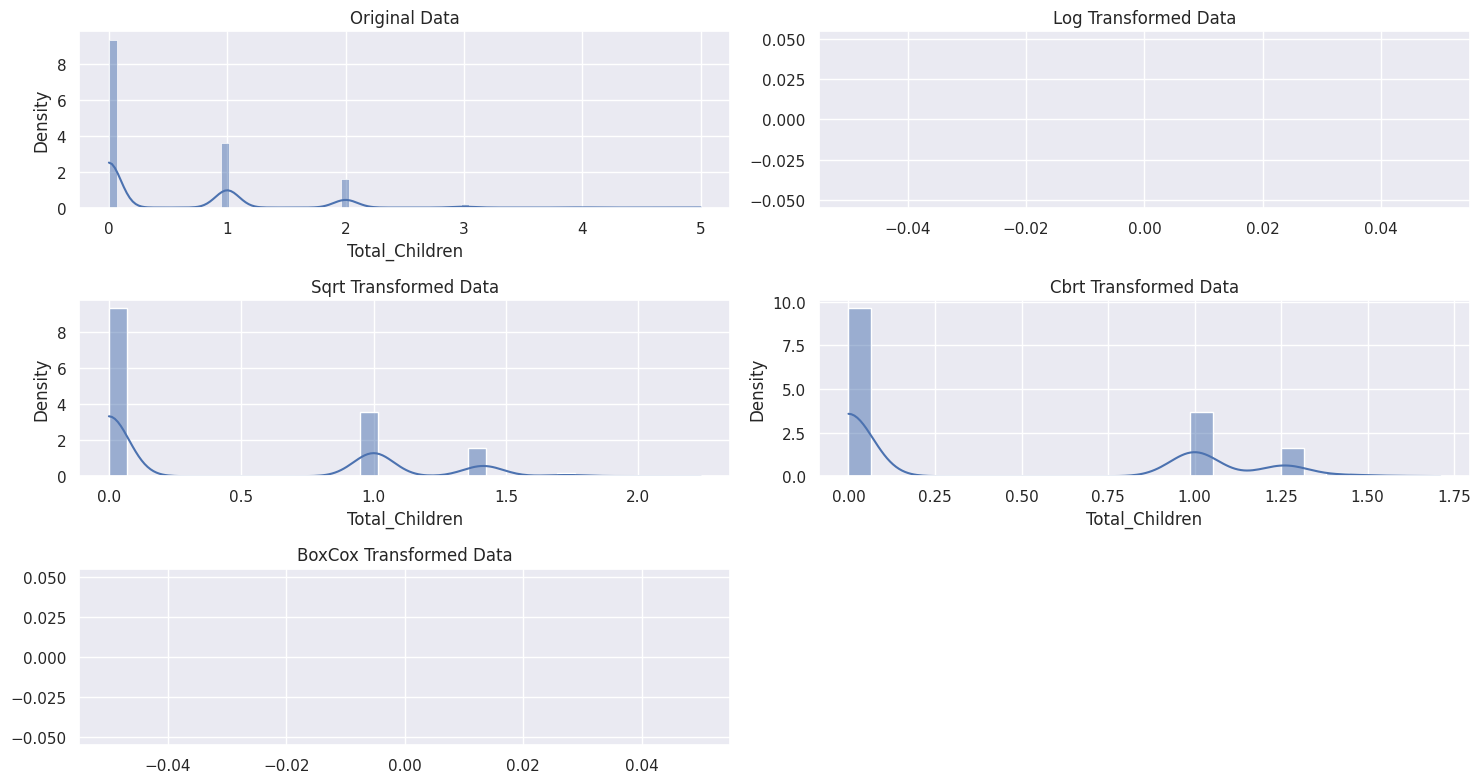

In [100]:
log_Total_Children, sqrt_Total_Children, cbrt_Total_Children, boxcox_Total_Children = transform_col('Total_Children')

Skewness of 'Total_Children' has reduced by Cube Root Transformation. So, we use Cube Root Transformation for 'YTotal_Children'. Log and Box-Cox Transformations cannot be done as some values are zero.

In [101]:
appl_data['Total_Children'] = cbrt_Total_Children

Skewness before any Transformation: 0.78449
Skewness after Log Transformation: -0.30600
Skewness after Square Root Transformation: 0.22458
Skewness after Cube Root Transformation: 0.04309
Skewness after Box-Cox Transformation: -0.01228


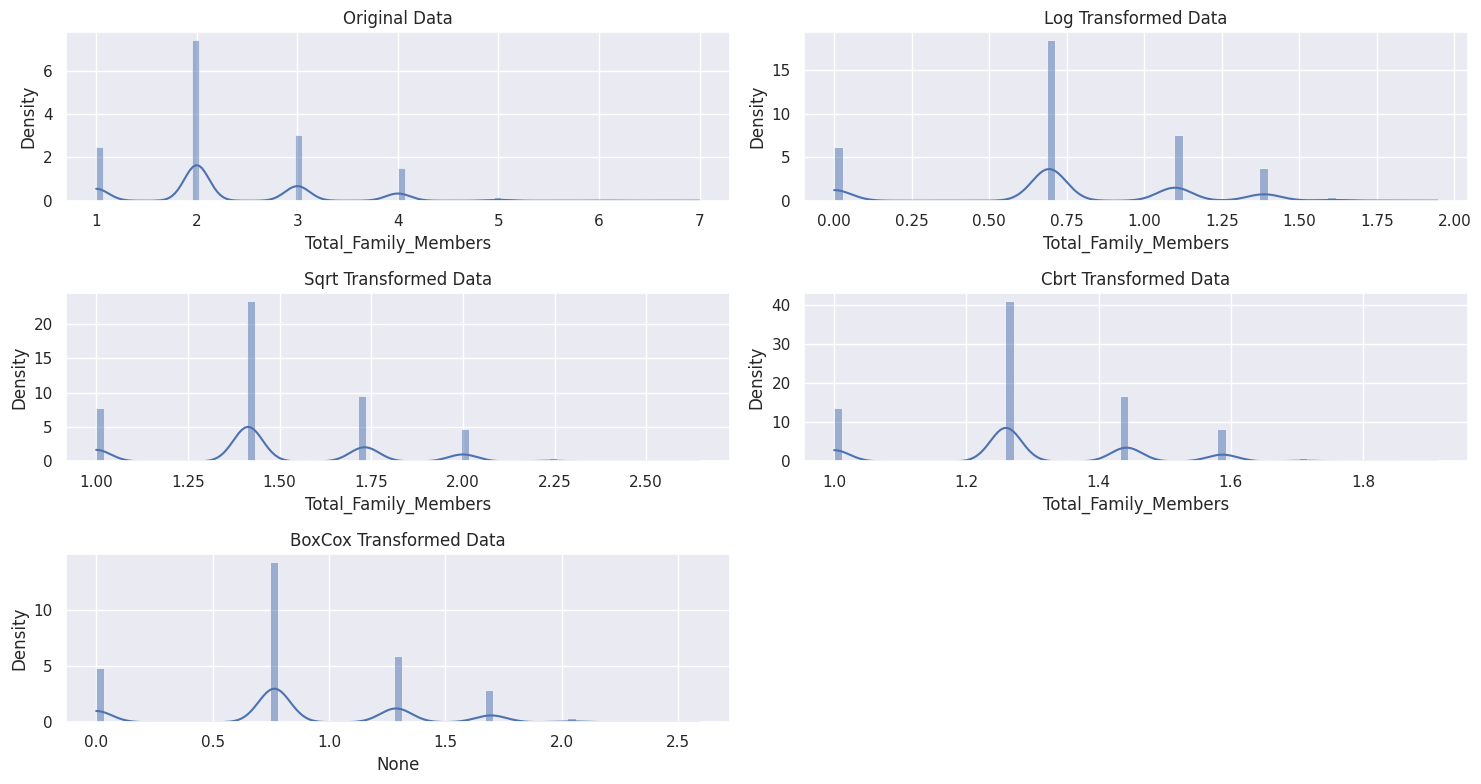

In [102]:
log_Total_Family_Members, sqrt_Total_Family_Members, cbrt_Total_Family_Members, boxcox_Total_Family_Members = transform_col('Total_Family_Members')

Skewness of 'Total_Family_Members' has considerably reduced by Box-Cox Transformation. So, we use Box-Cox Transformation for 'Total_Family_Members'.

In [103]:
appl_data['Total_Family_Members'] = boxcox_Total_Family_Members

Skewness before any Transformation: 12.43280
Log Transformation not applied due to either zero or non-positive values.
Skewness after Square Root Transformation: 3.85744
Skewness after Cube Root Transformation: 2.84895
Box-Cox Transformation not applied due to either zero or non-positive values.


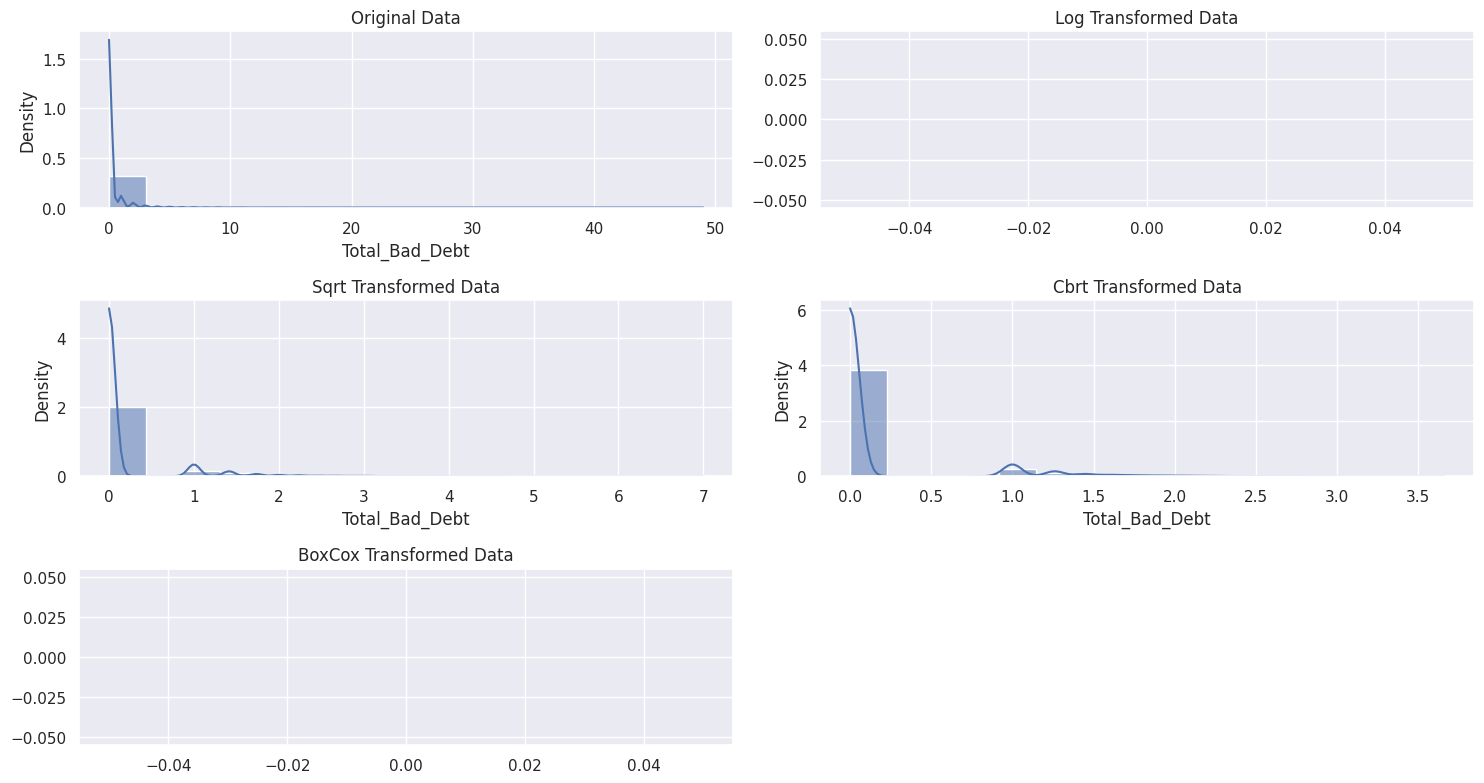

In [104]:
log_Total_Bad_Debt, sqrt_Total_Bad_Debt, cbrt_Total_Bad_Debt, boxcox_Total_Bad_Debt = transform_col('Total_Bad_Debt')

Skewness of 'Total_Bad_Debt' has reduced by Cube Root Transformation. So, we use Cube Root Transformation for 'Total_Bad_Debt'. Log and Box-Cox Transformations cannot be done as some values are zero.

In [105]:
appl_data['Total_Bad_Debt'] = cbrt_Total_Bad_Debt

#Outliers:

##Outlier Detection:

Outlier is a data point that stands out significantly from the rest of the data. It can be an extremely high or low value compared to the other observations in a dataset. Outliers can be caused by measurement errors, natural variations in the data, or even unexpected discoveries.

There are several ways to treat outliers in a dataset, depending on the nature of the outliers and the problem being solved.

In [106]:
# Select numerical columns
numerical_cols = appl_data.select_dtypes(include=['int64', 'float64']).columns

In [107]:
def iqr_outliers(appl_data):
    Q1 = appl_data.quantile(0.25)
    Q3 = appl_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (appl_data < lower_bound) | (appl_data > upper_bound)
    return outliers

# Apply outlier detection to numerical columns
outliers = appl_data[numerical_cols].apply(iqr_outliers)

# Identify columns that contain outliers
outlier_columns = outliers.any(axis=0)
outlier_column_names = outlier_columns[outlier_columns].index.tolist()

# Count total outlier columns
#total_outlier_columns = len(outlier_column_names)
#print("Total outlier columns:", total_outlier_columns)

# Print outlier column names
print("Outlier columns:", outlier_column_names)


# Identify rows with outliers
outlier_rows = appl_data[outliers.any(axis=1)]

# Count total outlier rows
total_outlier_rows = len(outlier_rows)

print("\nTotal outlier rows:", total_outlier_rows)


Outlier columns: ['Total_Income', 'Owned_Email', 'Total_Family_Members', 'Total_Bad_Debt', 'Status']

Total outlier rows: 5767


Another method is:

In [108]:
def detect_outliers_zscore(column):
    thres = 3
    mean = np.mean(column)
    std = np.std(column)
    outliers = []
    for i in column:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

total_outliers=0
outlier_cols=[]
for col in numerical_cols:
    outliers = detect_outliers_zscore(appl_data[col])
    print(f"Total Outliers of {col} from Z-scores method: ", len(outliers))
    total_outliers=total_outliers+len(outliers)
    if len(outliers) != 0:
      outlier_cols.append(col)

print('\n\n The columns with outliers are : \n',outlier_cols)
print('\n\n Total Number of outliers : \n',total_outliers )

Total Outliers of Owned_Car from Z-scores method:  0
Total Outliers of Owned_Realty from Z-scores method:  0
Total Outliers of Total_Children from Z-scores method:  0
Total Outliers of Total_Income from Z-scores method:  174
Total Outliers of Owned_Work_Phone from Z-scores method:  0
Total Outliers of Owned_Phone from Z-scores method:  0
Total Outliers of Owned_Email from Z-scores method:  0
Total Outliers of Total_Family_Members from Z-scores method:  18
Total Outliers of Applicant_Age from Z-scores method:  0
Total Outliers of Years_of_Working from Z-scores method:  0
Total Outliers of Total_Bad_Debt from Z-scores method:  598
Total Outliers of Total_Good_Debt from Z-scores method:  0
Total Outliers of Status from Z-scores method:  121


 The columns with outliers are : 
 ['Total_Income', 'Total_Family_Members', 'Total_Bad_Debt', 'Status']


 Total Number of outliers : 
 911


Dropping 'Status' from outlier columns because the number of outliers shown as 121 is the number of rows when status=0.

In [109]:
del(outlier_cols[-1])
outlier_cols

['Total_Income', 'Total_Family_Members', 'Total_Bad_Debt']

We are not removing the outlier values from our analysis. if so, our data becomes thin.

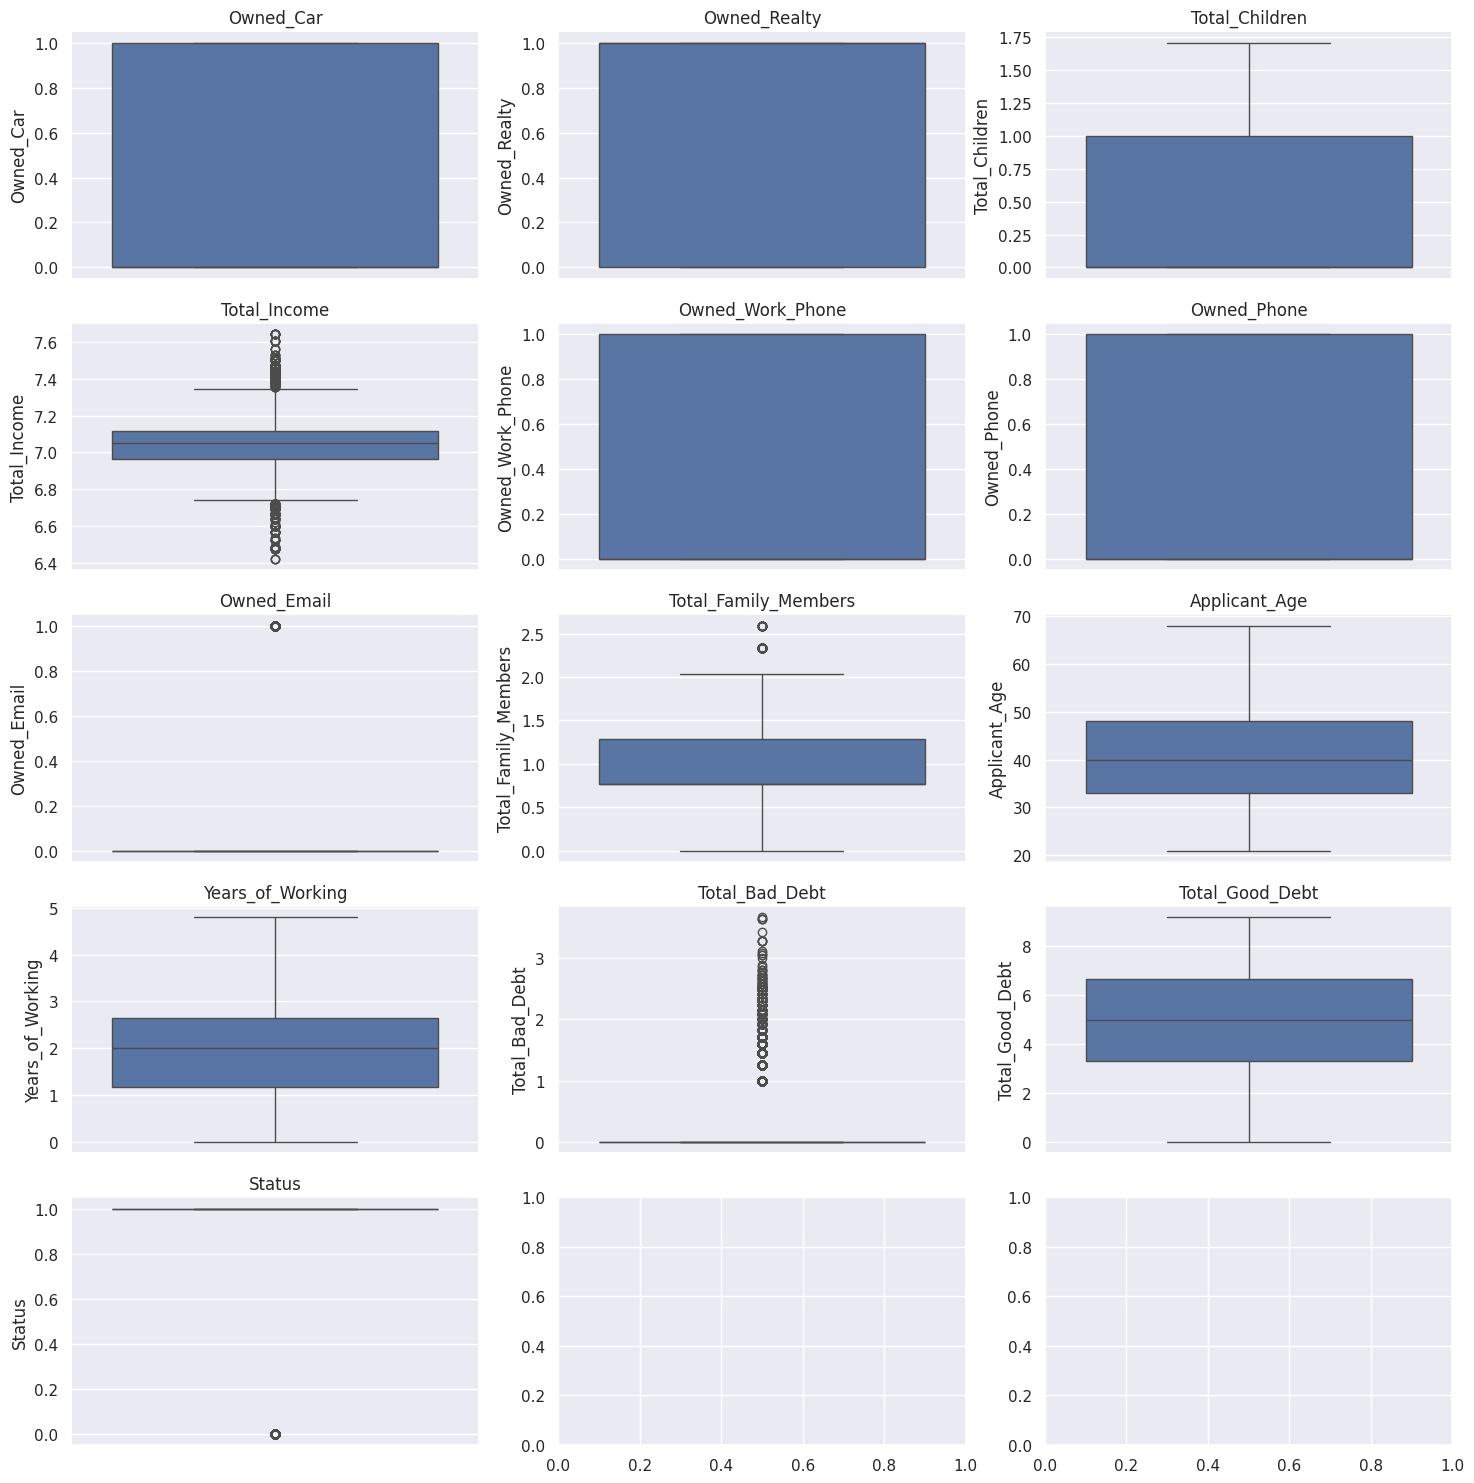

In [110]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=appl_data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

From the box plot visualization, the columns with outliers are ['Total_Income', 'Total_Family_Members', 'Total_Bad_Debt']. It is same as z-score outlier columns. The deviation for 'Total_Family_Members' is negligible and it is just 18 rows with outliers. So, ignoring it.



All the methods - IQR, Z-Score and Box-plot visualization gives the same outlier columns.

##Outlier Removal:

Capping involves limiting extreme values to reduce the impact of outliers. Instead of removing outliers, we cap them at a specified percentile.

###IQR Capping:

 IQR-based capping is a standard method for outlier detection and capping and is widely used in practice due to its simplicity and effectiveness.

 But here, IQR Capping seemed to be inappropriate due to:

*  The outliers are felt as legitimate extreme cases.


* On applying IQR capping in the outliers of "Total_Bad_Debt", the outliers reduced to zero failing to preserve the standard deviation of the column.

So, considering Percentile Capping instead.

###Percentile Capping

In [111]:
for outlier_column in  outlier_cols:

#Selecting the percentile as 95 and 5
  lower_percentile = 0.05
  upper_percentile = 0.95

  # Calculate the percentile values for the 'Total_Bad_Debt' column
  lower_bound = appl_data[outlier_column].quantile(lower_percentile)
  upper_bound = appl_data[outlier_column].quantile(upper_percentile)

  # Replacing values below lower_cap with lower_cap
  appl_data[outlier_column] = np.where(appl_data[outlier_column] < lower_bound, lower_bound, appl_data[outlier_column])

  # Replacing values above upper_cap with upper_cap
  appl_data[outlier_column] = np.where(appl_data[outlier_column] > upper_bound, upper_bound, appl_data[outlier_column])

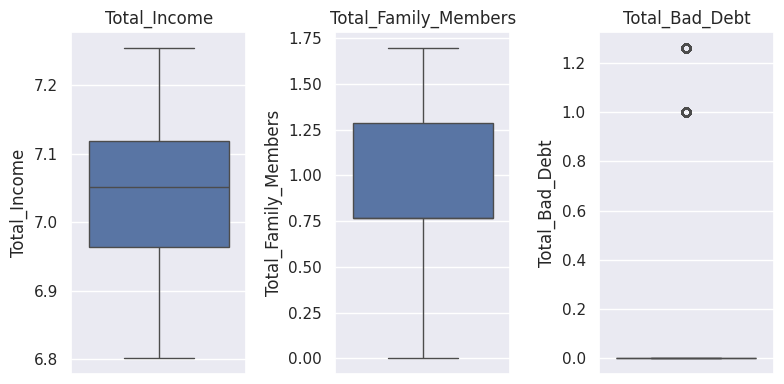

In [112]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(outlier_cols):
    sns.boxplot(y=appl_data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


Percentile capping, in this case, preserves the variability in the data and maintains the standard deviation, leading to a more accurate and interpretable analysis.

#Feature Engineering:

##Encoding Categorical Columns:

Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data.

The columns 'Applicant_Gender', 'Income_Type', 'Family_Status', 'Housing_Type' and 'Job_Title' contain nominal data where as the column 'Education_Type' can be considered as ordinal data. So we need to use One-Hot Encoding and Label Encoding respectively.

In [113]:
# One-Hot Encoding for Nominal Data
nominal_columns = ['Applicant_Gender', 'Income_Type', 'Family_Status', 'Housing_Type', 'Job_Title']
appl_data= pd.get_dummies(appl_data, columns=nominal_columns)

In [114]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
le.fit(['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']) #to define order
appl_data['Education_Type']=le.transform(appl_data['Education_Type'])

In [115]:
appl_data.head()

,Owned_Car,Owned_Realty,Total_Children,Total_Income,Education_Type,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,...,Job_Title_Laborers,Job_Title_Low-skill Laborers,Job_Title_Managers,Job_Title_Medicine staff,Job_Title_Private service staff,Job_Title_Realty agents,Job_Title_Sales staff,Job_Title_Secretaries,Job_Title_Security staff,Job_Title_Waiters/barmen staff
0,1,1,0.0,6.906970,4,0,0,0,0.76547,59,...,False,False,False,False,False,False,False,False,True,False
1,0,1,0.0,7.172092,4,0,1,1,0.00000,53,...,False,False,False,False,False,False,True,False,False,False
2,0,1,0.0,7.172092,4,0,1,1,0.00000,53,...,False,False,False,False,False,False,True,False,False,False
3,0,1,0.0,7.172092,4,0,1,1,0.00000,53,...,False,False,False,False,False,False,True,False,False,False
4,0,1,0.0,7.172092,4,0,1,1,0.00000,53,...,False,False,False,False,False,False,True,False,False,False


Adding new features from the already existing columns, to the dataset:

In [116]:
#Derived Features
appl_data['Total_Debt']=appl_data['Total_Good_Debt']+appl_data['Total_Bad_Debt']
appl_data['Good_to_Bad_Debt_Ratio'] = appl_data['Total_Good_Debt'] / (appl_data['Total_Bad_Debt'] + 1)  # Adding 1 to avoid division by zero

In [117]:
appl_data.shape

(25128, 52)

In [118]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Owned_Car                           25128 non-null  int64  
 1   Owned_Realty                        25128 non-null  int64  
 2   Total_Children                      25128 non-null  float64
 3   Total_Income                        25128 non-null  float64
 4   Education_Type                      25128 non-null  int64  
 5   Owned_Work_Phone                    25128 non-null  int64  
 6   Owned_Phone                         25128 non-null  int64  
 7   Owned_Email                         25128 non-null  int64  
 8   Total_Family_Members                25128 non-null  float64
 9   Applicant_Age                       25128 non-null  int64  
 10  Years_of_Working                    25128 non-null  float64
 11  Total_Bad_Debt                      25128

#Addressing Imbalance of the dataset:

An imbalanced dataset cause biased predictions.
The model trained on an imbalanced dataset might end up predicting only the majority class for most or all instances, as this would yield a high accuracy despite being ineffective. The model may struggle to correctly identify instances of the minority class , leading to low recall and F1-score for the minority class.

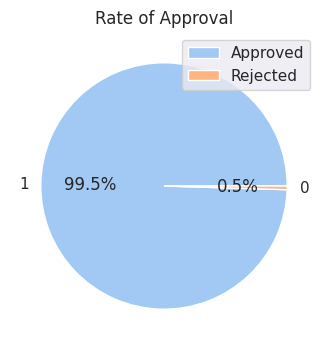

In [120]:
status_counts = appl_data['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(status_counts, labels=status_counts.index, autopct='%.1f%%', colors=sns.color_palette('pastel'))
plt.title('Rate of Approval')
plt.legend(loc='upper right', labels=['Approved', 'Rejected'])
plt.show()

The dataset is having severe imbalance -

99.5% of the data belongs to class 1,

only 0.5% to the other,

Splitting the dataset before applying techniques to balance the dataset:

In [121]:
y = appl_data['Status']
X = appl_data.drop('Status', axis=1)

In [122]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

##SMOTE Technique:

Synthetic Minority Over-sampling Technique is a popular method for handling class imbalance in datasets. SMOTE generates synthetic samples for the minority class by interpolating between existing samples. For each minority class sample, SMOTE finds its k-nearest neighbors and creates new samples along the line segments joining the sample with its neighbors.

In [123]:
counter=Counter(y_train)
print('Before : ',counter)

#oversampling the train dataset using SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=10).fit_resample(X_train, y_train)

counter=Counter(y_train_smote)
print('After',counter)

Before :  Counter({1: 20005, 0: 97})
After Counter({1: 20005, 0: 20005})


<Axes: xlabel='count', ylabel='Status'>

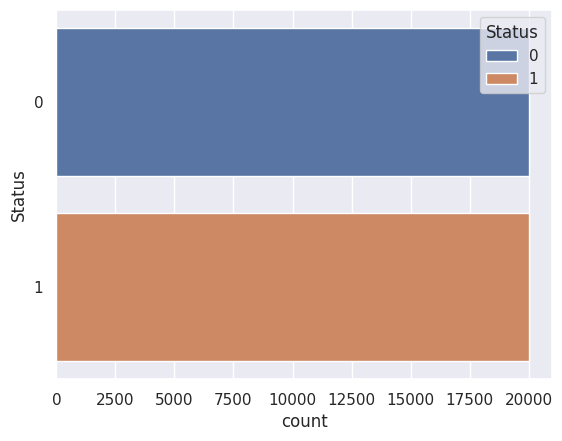

In [124]:
sns.countplot(y=y_train_smote,data=appl_data,hue=y_train_smote,palette='deep')

#Feature Selection

Feature selection is a crucial step in machine learning to identify the most relevant features for a model. It helps improve model performance, reduces overfitting, and enhances interpretability.

###1.Filter method: Select K-best


The Select K-Best filter method is a feature selection technique used in machine learning to select the top k features from the dataset based on statistical tests. It helps in reducing the dimensionality of the data by choosing the most relevant features, which can improve model performance and reduce computational costs.

Chi-squared : This test is used for categorical variables to see if the distribution of the categorical variable is independent of the target variable.

ANOVA F-test : This test is used for numerical variables to determine the importance of each feature in explaining the variance of the target variable.

In [125]:
# Separate categorical and numerical features
categorical_cols = X_train_smote.select_dtypes(include=['object','bool']).columns
numerical_cols = X_train_smote.select_dtypes(include=['int64', 'float64']).columns

#Creating Separate DataFrames for Categorical and Numerical Columns
X_categorical = X_train_smote[categorical_cols]
X_numerical = X_train_smote[numerical_cols]

# Chi-squared test for categorical features
chi_selector = SelectKBest(chi2, k=15)
X_chi = chi_selector.fit_transform(X_categorical, y_train_smote)
chi_selected_features = X_categorical.columns[chi_selector.get_support()]

# ANOVA F-Test for numerical features
f_selector = SelectKBest(f_classif, k=10)
X_f = f_selector.fit_transform(X_numerical, y_train_smote)
f_selected_features = X_numerical.columns[f_selector.get_support()]

print("Chi-squared selected features:", chi_selected_features)
print("\n\nANOVA selected features:", f_selected_features)

# Combine selected features
Kbest_features = np.concatenate((chi_selected_features, f_selected_features))


Chi-squared selected features: Index(['Applicant_Gender_M', 'Income_Type_Commercial associate',
       'Income_Type_Pensioner', 'Income_Type_Working',
       'Family_Status_Single / not married', 'Family_Status_Widow',
       'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment',
       'Job_Title_Cooking staff', 'Job_Title_IT staff',
       'Job_Title_Low-skill Laborers', 'Job_Title_Managers',
       'Job_Title_Medicine staff', 'Job_Title_Sales staff',
       'Job_Title_Security staff'],
      dtype='object')


ANOVA selected features: Index(['Owned_Car', 'Owned_Realty', 'Total_Income', 'Owned_Work_Phone',
       'Owned_Phone', 'Years_of_Working', 'Total_Bad_Debt', 'Total_Good_Debt',
       'Total_Debt', 'Good_to_Bad_Debt_Ratio'],
      dtype='object')


###2.Wrapper Method: Recursive Feature Elimination (RFE)

It iteratively removes the least important features, aiming to identify the most relevant subset of features that contribute the most to the model's performance.

In [126]:
# Create a logistic regression model
model = LogisticRegression()

# Create RFE object
rfe = RFE(model, n_features_to_select=25)
fit = rfe.fit(X_train_smote, y_train_smote)

rfe_features = X_train_smote.columns[fit.support_]

# Print selected features
print("Selected features: " , rfe_features)
print("\n\nFeature ranking: ", fit.ranking_)

Selected features:  Index(['Total_Income', 'Total_Bad_Debt', 'Total_Good_Debt',
       'Applicant_Gender_F', 'Applicant_Gender_M',
       'Income_Type_Commercial associate', 'Income_Type_Pensioner',
       'Income_Type_Working', 'Family_Status_Married', 'Family_Status_Widow',
       'Housing_Type_With parents', 'Job_Title_Accountants',
       'Job_Title_Cooking staff', 'Job_Title_Core staff', 'Job_Title_Drivers',
       'Job_Title_High skill tech staff', 'Job_Title_IT staff',
       'Job_Title_Laborers', 'Job_Title_Low-skill Laborers',
       'Job_Title_Managers', 'Job_Title_Medicine staff',
       'Job_Title_Sales staff', 'Job_Title_Security staff', 'Total_Debt',
       'Good_to_Bad_Debt_Ratio'],
      dtype='object')


Feature ranking:  [18 14 26  1 21  4 13 19 10 24 16  1  1  1  1  1  1 15 27  1 11  1 12  2
  1 25  9  8  7 20  1  1  6  1  1  1 22  1  1  1  1  1  1  5 23  1 17  1
  3  1  1]


###3.Embedded Methods : Random Forest

Embedded methods for feature selection integrate the feature selection process within the model training process. Unlike filter methods (which select features before training) and wrapper methods (which evaluate subsets of features by training models on them), embedded methods use the model's inherent ability to weigh feature importance during the training process.

In [127]:
# Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf.feature_importances_

# Select top 25 features
num_features = 25

# Get the indices of the top features
indices = np.argsort(importances)[::-1][:num_features]

rforest_features = X_train_smote.columns[indices]

print("Selected features:", rforest_features)

Selected features: Index(['Total_Bad_Debt', 'Good_to_Bad_Debt_Ratio', 'Total_Good_Debt',
       'Total_Debt', 'Total_Family_Members', 'Total_Children',
       'Applicant_Gender_M', 'Years_of_Working',
       'Income_Type_Commercial associate', 'Applicant_Age', 'Total_Income',
       'Owned_Work_Phone', 'Applicant_Gender_F', 'Family_Status_Married',
       'Owned_Phone', 'Owned_Realty', 'Income_Type_Working',
       'Family_Status_Single / not married', 'Owned_Car', 'Job_Title_IT staff',
       'Job_Title_Managers', 'Education_Type', 'Job_Title_Security staff',
       'Housing_Type_House / apartment', 'Job_Title_Sales staff'],
      dtype='object')


#Model

###Creating dataframes with the Selected features :

In [128]:
X_train_kbest = X_train_smote[Kbest_features]
X_test_kbest = X_test[Kbest_features]

In [129]:
X_train_rfe = X_train_smote[rfe_features]
X_test_rfe = X_test[rfe_features]

In [130]:
X_train_rforest = X_train_smote[rforest_features]
X_test_rforest = X_test[rforest_features]

In [131]:
# Lists of train and test sets for each feature selection method
X_train_list = [X_train_kbest, X_train_rfe, X_train_rforest]
X_test_list = [X_test_kbest, X_test_rfe, X_test_rforest]

In [132]:
feature_set = ['K-Best','RFE','Random Forest']
model_names = ["Logistic Regression", "SVM", "Gradient Boosting", "MLP Classifier", "Random Forest Classifier"]

Creating and analyzing five different models with the three different datasets:

In [133]:
log_model = {}
sv_model = {}
gbc_model = {}
mlpc_model = {}
rfc_model = {}

y_pred_log={}
y_pred_svm={}
y_pred_gb={}
y_pred_mlp={}
y_pred_rf={}


for i, (feature_set_name, X_train, X_test) in enumerate(zip(feature_set, X_train_list, X_test_list)):

    print(f"----- Evaluating features from \'{feature_set_name}\' Feature Selection Method -----")

    # Logistic Regression
    log_reg = LogisticRegression(class_weight='balanced', random_state=0)
    log_model[feature_set_name] = log_reg.fit(X_train, y_train_smote)
    y_pred_log[feature_set_name] = log_reg.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log[feature_set_name]))

    # SVM
    svm_model = SVC(probability=True, class_weight='balanced')
    sv_model[feature_set_name] = svm_model.fit(X_train, y_train_smote)
    y_pred_svm[feature_set_name]= svm_model.predict(X_test)
    print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm[feature_set_name]))

    # Gradient Boosting
    gb_model = GradientBoostingClassifier(random_state=0)
    gbc_model[feature_set_name] = gb_model.fit(X_train, y_train_smote)
    y_pred_gb[feature_set_name] = gb_model.predict(X_test)
    print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb[feature_set_name]))

    # MLP Classifier
    mlp_model = MLPClassifier(random_state=0)
    mlpc_model[feature_set_name] = mlp_model.fit(X_train, y_train_smote)
    y_pred_mlp[feature_set_name] = mlp_model.predict(X_test)
    print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp[feature_set_name]))

    #Random Forest Classifier
    rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
    rfc_model[feature_set_name] = rf_model.fit(X_train, y_train_smote)
    y_pred_rf[feature_set_name] = rf_model.predict(X_test)
    print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf[feature_set_name]))


----- Evaluating features from 'K-Best' Feature Selection Method -----
Logistic Regression Accuracy: 0.9844807003581377
SVM Accuracy: 0.9781138081973737
Gradient Boosting Accuracy: 0.9898527656187823
MLP Classifier Accuracy: 0.9946279347393554
Random Forest Classifier Accuracy: 0.9970155192996418
----- Evaluating features from 'RFE' Feature Selection Method -----
Logistic Regression Accuracy: 0.9900517309988062
SVM Accuracy: 0.982292081177875
Gradient Boosting Accuracy: 0.9892558694787107
MLP Classifier Accuracy: 0.9964186231595702
Random Forest Classifier Accuracy: 0.9960206923995225
----- Evaluating features from 'Random Forest' Feature Selection Method -----
Logistic Regression Accuracy: 0.9882610425785914
SVM Accuracy: 0.9633903700756068
Gradient Boosting Accuracy: 0.9930362116991643
MLP Classifier Accuracy: 0.9964186231595702
Random Forest Classifier Accuracy: 0.9966175885395941


##Evaluating the Model:

In [134]:
# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)

    print(f"************* Model: {model_name} *************")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("\nConfusion Matrix:\n", confusion_mat)
    print('\nClassification Report :\n', classification_rep)
    print("\n")

# Loop over feature sets and evaluate models
for feature_name in feature_set:
    print(f"--------------------------- {feature_name} Feature Selection Results ---------------------------\n")

    # Evaluate Logistic Regression
    evaluate_model(f"Logistic Regression ({feature_name})", y_test, y_pred_log[feature_name])

    # Evaluate SVM
    evaluate_model(f"SVM ({feature_name})", y_test, y_pred_svm[feature_name])

    # Evaluate Gradient Boosting
    evaluate_model(f"Gradient Boosting ({feature_name})", y_test, y_pred_gb[feature_name])

    # Evaluate MLP Classifier
    evaluate_model(f"MLP Classifier ({feature_name})", y_test, y_pred_mlp[feature_name])

    # Evaluate Random Forest Classifier
    evaluate_model(f"Random Forest ({feature_name})", y_test, y_pred_rf[feature_name])


--------------------------- K-Best Feature Selection Results ---------------------------

************* Model: Logistic Regression (K-Best) *************
Accuracy:  0.9844807003581377
Precision:  0.9989866234292664
Recall:  0.9854058376649341
F1-score:  0.9921497584541064

Confusion Matrix:
 [[  19    5]
 [  73 4929]]

Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.79      0.33        24
           1       1.00      0.99      0.99      5002

    accuracy                           0.98      5026
   macro avg       0.60      0.89      0.66      5026
weighted avg       1.00      0.98      0.99      5026



************* Model: SVM (K-Best) *************
Accuracy:  0.9781138081973737
Precision:  0.9991836734693877
Recall:  0.9788084766093562
F1-score:  0.9888911331044232

Confusion Matrix:
 [[  20    4]
 [ 106 4896]]

Classification Report :
               precision    recall  f1-score   support

           0       0.16      0

**Inferences:**

When selecting a model, especially in the context of imbalanced classes, we need to consider both overall performance metrics and how well the model handles the minority class.

**Accuracy**: While high accuracy is desirable, it can be misleading in imbalanced datasets because it can be inflated by the majority class. Hence, accuracy alone isn't sufficient.

**Precision and Recall:** These metrics are crucial for the minority class. Precision measures how many of the predicted positives are actually positives, while recall measures how many of the actual positives were correctly identified.

**F1-Score:** The harmonic mean of precision and recall, giving a balanced measure. Higher F1-score indicates better performance on both precision and recall.

**Confusion Matrix:** Shows the true positives, false positives, true negatives, and false negatives, providing a comprehensive view of model performance.


* The accuracy is very high for all the models.
* Precision, Recall and F1-Score is very high in predicting the majority class- here, it is class 1 i.e. 'Approved'.
* Precision, Recall and F1-Score is low to moderate in predicting the minority class- here, it is class 0 i.e. 'Rejected',

In an imbalanced dataset, the minority class is often overshadowed by the majority class. A high F1 score for the minority class indicates that the model is effective at identifying and correctly classifying the minority class instances. A model with a high overall accuracy might still perform poorly on the minority class if it mostly predicts the majority class. The F1 score helps to assess the performance on the minority class directly.

Here, the model is overfitting due to the extreme imbalanced dataset where model gets the real values for only class 1 'Approved' and mostly synthetic values for class 0 'Rejected'. To overcome the overfitting, the collection of more real data of 'Rejection' instances is preferred.

As discussed above, the most performing model here is Random Forest Classifier with K-Best Features. It is having an F1-Score = 0.71 for minority class.

##Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic (ROC) Curve is a graphical representation used to evaluate the performance of a binary classification model. It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various threshold settings. The ROC curve is particularly useful for assessing how well a model distinguishes between the two classes across different thresholds.

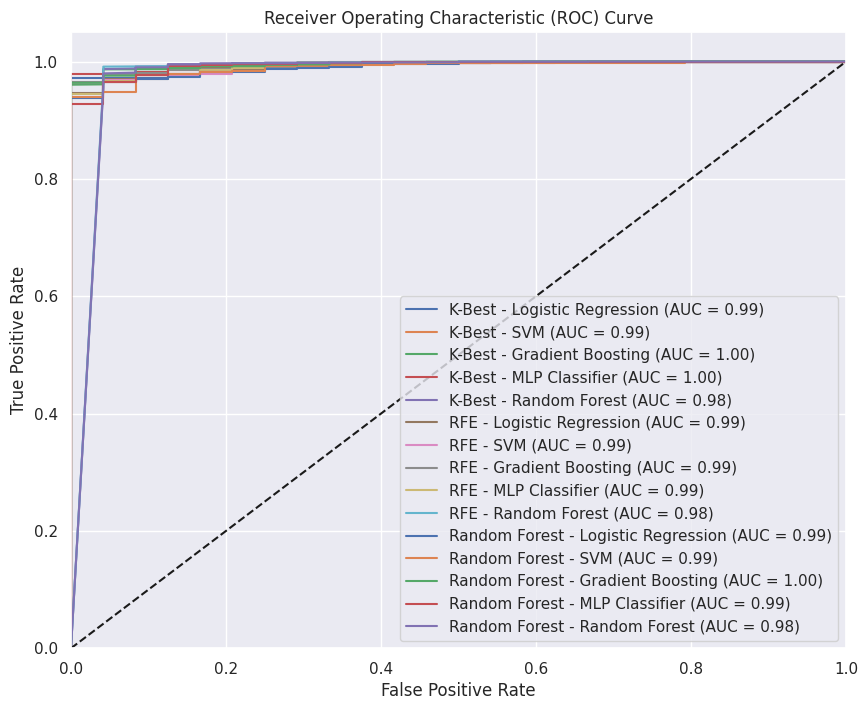

In [135]:
def plot_roc_curve(model_name, y_true, y_pred_proba, label_prefix=''):
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label_prefix}{model_name} (AUC = %0.2f)' % roc_auc)

# Loop over feature sets and models to plot ROC curves
plt.figure(figsize=(10, 8))
for feature_name, X_test in zip(feature_set, X_test_list):

    # Logistic Regression
    y_pred_proba_log = log_model[feature_name].predict_proba(X_test)[:, 1]
    plot_roc_curve('Logistic Regression', y_test, y_pred_proba_log, label_prefix=f'{feature_name} - ')

    # SVM
    y_pred_proba_svm = sv_model[feature_name].predict_proba(X_test)[:, 1]
    plot_roc_curve('SVM', y_test, y_pred_proba_svm, label_prefix=f'{feature_name} - ')

    # Gradient Boosting
    y_pred_proba_gb = gbc_model[feature_name].predict_proba(X_test)[:, 1]
    plot_roc_curve('Gradient Boosting', y_test, y_pred_proba_gb, label_prefix=f'{feature_name} - ')

    # MLP Classifier
    y_pred_proba_mlp = mlpc_model[feature_name].predict_proba(X_test)[:, 1]
    plot_roc_curve('MLP Classifier', y_test, y_pred_proba_mlp, label_prefix=f'{feature_name} - ')

    # Random Forest
    y_pred_proba_rf = rfc_model[feature_name].predict_proba(X_test)[:, 1]
    plot_roc_curve('Random Forest', y_test, y_pred_proba_rf, label_prefix=f'{feature_name} - ')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Understanding the ROC Curve:

* Most models have AUC values very close to 1
* Many of the ROC curves overlap, suggesting that the different combinations of feature selection methods and models might not lead to significantly different performance in this case.
* High AUC Values: very close to 1 might indicate overfitting or a highly imbalanced dataset.


The AUC of Random Forest Classifier with K-Best features is 0.98.

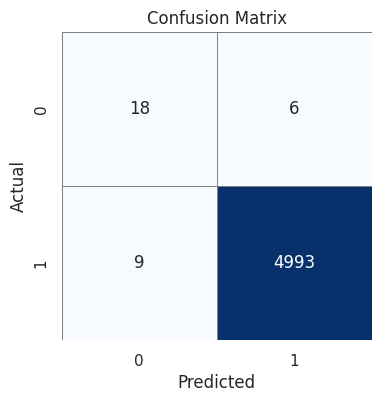

In [155]:
status_class = [0, 1]  # Class names
cnf_matrix = confusion_matrix(y_test, y_pred_rf['K-Best'])

# Plotting
plt.figure(figsize=(4, 4))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, linecolor='grey', fmt='g', linewidths=0.5, cmap='Blues', cbar=False)
plt.xticks(np.arange(len(status_class))+0.5, status_class)
plt.yticks(np.arange(len(status_class))+0.5, status_class)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


From, the confusion matrix :

* True Positives (TP): 4993 - Instances correctly classified as positive.

* True Negatives (TN): 18 - Instances correctly classified as negative.

* False Positives (FP): 9 - Instances incorrectly classified as positive (Type I error).

* False Negatives (FN): 6 - Instances incorrectly classified as negative (Type II error).



#Hyper Parameter Tuning and Cross-Validation

Hyperparameter Tuning and Cross-Validation are crucial techniques in machine learning to optimize model performance and ensure robust evaluation.


Hyperparameter Tuning involves finding the best set of hyperparameters for a machine learning model.

In [142]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define StratifiedKFold for cross-validation to handle class imbalance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=skf, scoring='f1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_kbest, y_train_smote)

# Get the best parameters and the best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation F1 score: {best_score:.4f}")

# Evaluate the best model with cross-validation
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train_kbest, y_train_smote, cv=skf, scoring='f1')

print(f"Cross-validation F1 scores for best Random Forest model with K-Best features: {cv_scores}")
print(f"Mean F1 score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Predict on the test set
y_pred = best_model.predict(X_test_kbest)

# Evaluate the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model: Best Random Forest")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation F1 score: 0.9983
Cross-validation F1 scores for best Random Forest model with K-Best features: [0.99887458 0.9985     0.99849925 0.99774775 0.99787367]
Mean F1 score: 0.9983
Standard deviation: 0.0004
Model: Best Random Forest
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.997
Precision: 0.999
Recall: 0.998
F1-score: 0.999


#Final Model

In [143]:
best_rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=0 )


#Saving the Model

In [164]:
# Save the model to a file
joblib.dump(model, 'rfclassifier.pkl')


['rfclassifier.pkl']

#Conclusions:

* The model is overfitting due to the extreme imbalanced dataset.

* The model performs well in predicting class 1 and moderate performance  for class 0 .

* To overcome the overfitting, the collection of more real data of 'Rejection' instances is preferred.